In [7]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as pyo
import plotly.graph_objects as go

np.random.seed(1)
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
import os

In [8]:
path = './price_data/'
datalist = []
for file in os.listdir(path):
    if file.endswith(".csv"):
        datapath = os.path.join(path, file)
        datalist.append(datapath)
#         print(os.path.join(path, file))
print(datalist)

['./price_data/028260.csv', './price_data/207940.csv', './price_data/028050.csv', './price_data/034020.csv', './price_data/047040.csv', './price_data/042660.csv', './price_data/180640.csv', './price_data/034220.csv', './price_data/029780.csv', './price_data/241560.csv', './price_data/128940.csv', './price_data/035720.csv', './price_data/033780.csv', './price_data/021240.csv', './price_data/036460.csv', './price_data/032830.csv', './price_data/035250.csv', './price_data/032640.csv', './price_data/028670.csv', './price_data/030200.csv', './price_data/139480.csv', './price_data/036570.csv', './price_data/024110.csv', './price_data/035420.csv', './price_data/051910.csv', './price_data/034730.csv', './price_data/047810.csv', './price_data/055550.csv', './price_data/051900.csv', './price_data/086790.csv', './price_data/096770.csv', './price_data/068270.csv', './price_data/000660.csv', './price_data/097950.csv', './price_data/078930.csv', './price_data/000120.csv', './price_data/004990.csv', 

  1%|          | 1/87 [00:01<02:12,  1.54s/it]

Reconstruction error threshold: 0.7310426304786688
028260


  2%|▏         | 2/87 [00:02<02:01,  1.43s/it]

Reconstruction error threshold: 0.4237070909659105
207940


  3%|▎         | 3/87 [00:05<02:26,  1.74s/it]

Reconstruction error threshold: 0.23097326629864218
028050


  5%|▍         | 4/87 [00:06<02:18,  1.66s/it]

Reconstruction error threshold: 0.3560374614223083
034020


  6%|▌         | 5/87 [00:08<02:12,  1.62s/it]

Reconstruction error threshold: 0.5640894467694373
047040
Reconstruction error threshold: 0.8027334505267674
042660


  8%|▊         | 7/87 [00:11<02:11,  1.64s/it]

Reconstruction error threshold: 0.44955698452694604
180640


  9%|▉         | 8/87 [00:13<02:08,  1.63s/it]

Reconstruction error threshold: 0.6177778705487682
034220


 10%|█         | 9/87 [00:14<02:05,  1.61s/it]

Reconstruction error threshold: 0.7555668429827396
029780
Reconstruction error threshold: 0.729214557737411
241560


 13%|█▎        | 11/87 [00:17<02:02,  1.61s/it]

Reconstruction error threshold: 0.5048908953987661
128940


 14%|█▍        | 12/87 [00:19<01:58,  1.58s/it]

Reconstruction error threshold: 0.6429142203982096
035720


 15%|█▍        | 13/87 [00:21<01:58,  1.60s/it]

Reconstruction error threshold: 0.49200133035384996
033780


 16%|█▌        | 14/87 [00:22<01:55,  1.58s/it]

Reconstruction error threshold: 0.6351409309152065
021240


 17%|█▋        | 15/87 [00:24<02:00,  1.68s/it]

Reconstruction error threshold: 0.5402810553577637
036460


 18%|█▊        | 16/87 [00:26<01:56,  1.64s/it]

Reconstruction error threshold: 0.6726411373200434
032830


 20%|█▉        | 17/87 [00:27<01:52,  1.60s/it]

Reconstruction error threshold: 0.5054018778504163
035250


 21%|██        | 18/87 [00:29<01:49,  1.58s/it]

Reconstruction error threshold: 0.6344773408056111
032640


 22%|██▏       | 19/87 [00:31<01:54,  1.68s/it]

Reconstruction error threshold: 0.7254227598763721
028670


 23%|██▎       | 20/87 [00:32<01:49,  1.63s/it]

Reconstruction error threshold: 0.6523764032766848
030200


/home/ubuntu/anaconda3/envs/tensorflow2.4_p37/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

 24%|██▍       | 21/87 [00:34<01:45,  1.60s/it]

Reconstruction error threshold: 0.5475111158096165
139480


 25%|██▌       | 22/87 [00:35<01:41,  1.57s/it]

Reconstruction error threshold: 0.3088842419195694
036570


 26%|██▋       | 23/87 [00:37<01:46,  1.67s/it]

Reconstruction error threshold: 0.6679130385783949
024110


 28%|██▊       | 24/87 [00:38<01:42,  1.62s/it]

Reconstruction error threshold: 0.47084034182158246
035420


 29%|██▊       | 25/87 [00:40<01:38,  1.58s/it]

Reconstruction error threshold: 0.3750827843774337
051910


 30%|██▉       | 26/87 [00:41<01:35,  1.57s/it]

Reconstruction error threshold: 0.5996702660155926
034730


 31%|███       | 27/87 [00:43<01:41,  1.68s/it]

Reconstruction error threshold: 0.4181493625261577
047810


 32%|███▏      | 28/87 [00:45<01:36,  1.64s/it]

Reconstruction error threshold: 0.7273534978884488
055550


 33%|███▎      | 29/87 [00:46<01:32,  1.60s/it]

Reconstruction error threshold: 0.40838259308803027
051900


 34%|███▍      | 30/87 [00:48<01:30,  1.58s/it]

Reconstruction error threshold: 0.6119330667977386
086790


 36%|███▌      | 31/87 [00:50<01:27,  1.56s/it]

Reconstruction error threshold: 0.6195931797836471
096770


 37%|███▋      | 32/87 [00:52<01:32,  1.69s/it]

Reconstruction error threshold: 0.383836000126854
068270


 38%|███▊      | 33/87 [00:53<01:29,  1.66s/it]

Reconstruction error threshold: 0.35365811022439836
000660


 39%|███▉      | 34/87 [00:55<01:26,  1.63s/it]

Reconstruction error threshold: 0.6727511404394173
097950


 40%|████      | 35/87 [00:56<01:23,  1.61s/it]

Reconstruction error threshold: 0.6187163420643824
078930


 41%|████▏     | 36/87 [00:58<01:28,  1.73s/it]

Reconstruction error threshold: 0.5638130744336444
000120


 43%|████▎     | 37/87 [01:00<01:23,  1.68s/it]

Reconstruction error threshold: 0.41602172526602776
004990


 44%|████▎     | 38/87 [01:01<01:21,  1.66s/it]

Reconstruction error threshold: 0.6314749243704179
090430


 45%|████▍     | 39/87 [01:03<01:18,  1.63s/it]

Reconstruction error threshold: 0.723583043802395
081660


 46%|████▌     | 40/87 [01:04<01:14,  1.59s/it]

Reconstruction error threshold: 0.5545545623514023
086280


 47%|████▋     | 41/87 [01:06<01:19,  1.72s/it]

Reconstruction error threshold: 0.4672743680594137
071050


 48%|████▊     | 42/87 [01:08<01:15,  1.67s/it]

Reconstruction error threshold: 0.44747277682422815
000270


 49%|████▉     | 43/87 [01:10<01:11,  1.63s/it]

Reconstruction error threshold: 0.4788938516758566
066570


 51%|█████     | 44/87 [01:11<01:09,  1.61s/it]

Reconstruction error threshold: 0.6268482576493273
000100
Reconstruction error threshold: 0.47182038824884376
105560


 53%|█████▎    | 46/87 [01:15<01:11,  1.75s/it]

Reconstruction error threshold: 0.5943879056521666
000810


 54%|█████▍    | 47/87 [01:16<01:07,  1.69s/it]

Reconstruction error threshold: 0.39457059492884217
088980


 55%|█████▌    | 48/87 [01:18<01:04,  1.65s/it]

Reconstruction error threshold: 0.6079293251830236
000720


 56%|█████▋    | 49/87 [01:20<01:01,  1.62s/it]

Reconstruction error threshold: 0.5002901768406257
005380


 57%|█████▋    | 50/87 [01:21<00:59,  1.61s/it]

Reconstruction error threshold: 0.5949718508473787
002790
Reconstruction error threshold: 0.5341465240436811
005490


 60%|█████▉    | 52/87 [01:25<00:59,  1.70s/it]

Reconstruction error threshold: 0.5353333328724408
008560


 61%|██████    | 53/87 [01:26<00:56,  1.66s/it]

Reconstruction error threshold: 0.3035215373900869
006400


 62%|██████▏   | 54/87 [01:28<00:53,  1.62s/it]

Reconstruction error threshold: 0.6296181351372973
003410


 63%|██████▎   | 55/87 [01:29<00:51,  1.60s/it]

Reconstruction error threshold: 0.4529261616708603
003670


 64%|██████▍   | 56/87 [01:31<00:49,  1.60s/it]

Reconstruction error threshold: 0.5351435509898645
006280


 66%|██████▌   | 57/87 [01:33<00:52,  1.76s/it]

Reconstruction error threshold: 0.5638631534890011
003490


 67%|██████▋   | 58/87 [01:35<00:49,  1.70s/it]

Reconstruction error threshold: 0.730150709990796
005940


 68%|██████▊   | 59/87 [01:36<00:46,  1.65s/it]

Reconstruction error threshold: 0.5257268167541735
007070


 69%|██████▉   | 60/87 [01:38<00:44,  1.64s/it]

Reconstruction error threshold: 0.532817778952227
005930


 70%|███████   | 61/87 [01:39<00:41,  1.61s/it]

Reconstruction error threshold: 0.6731918258901894
006800


 71%|███████▏  | 62/87 [01:42<00:44,  1.77s/it]

Reconstruction error threshold: 0.7096815709137179
003550


 72%|███████▏  | 63/87 [01:43<00:41,  1.71s/it]

Reconstruction error threshold: 0.50034606809397
004020


 74%|███████▎  | 64/87 [01:45<00:38,  1.67s/it]

Reconstruction error threshold: 0.5680735267324623
010950


 75%|███████▍  | 65/87 [01:46<00:35,  1.62s/it]

Reconstruction error threshold: 0.5948113315380893
008770


 76%|███████▌  | 66/87 [01:48<00:33,  1.59s/it]

Reconstruction error threshold: 0.546251341723298
005830


 77%|███████▋  | 67/87 [01:49<00:32,  1.61s/it]

Reconstruction error threshold: 0.45456824789301
008930


 78%|███████▊  | 68/87 [01:51<00:33,  1.78s/it]

Reconstruction error threshold: 0.4428578162072013
011070


 79%|███████▉  | 69/87 [01:53<00:30,  1.71s/it]

Reconstruction error threshold: 0.7252530971457226
010130


 80%|████████  | 70/87 [01:55<00:28,  1.66s/it]

Reconstruction error threshold: 0.3729203311177757
009540


 82%|████████▏ | 71/87 [01:56<00:26,  1.63s/it]

Reconstruction error threshold: 0.36136832300897215
006360


 83%|████████▎ | 72/87 [01:58<00:24,  1.61s/it]

Reconstruction error threshold: 0.4800358934943621
010620


 84%|████████▍ | 73/87 [01:59<00:22,  1.58s/it]

Reconstruction error threshold: 0.2675815263770577
010140


 85%|████████▌ | 74/87 [02:01<00:23,  1.79s/it]

Reconstruction error threshold: 0.4176925162708637
009150


 86%|████████▌ | 75/87 [02:03<00:20,  1.72s/it]

Reconstruction error threshold: 0.5139800700501896
011170


 87%|████████▋ | 76/87 [02:05<00:18,  1.67s/it]

Reconstruction error threshold: 0.4768865165439301
009830


 89%|████████▊ | 77/87 [02:06<00:16,  1.64s/it]

Reconstruction error threshold: 0.47413772515882924
011780


 90%|████████▉ | 78/87 [02:08<00:14,  1.62s/it]

Reconstruction error threshold: 0.7738617497287572
012330


 91%|█████████ | 79/87 [02:09<00:12,  1.61s/it]

Reconstruction error threshold: 0.39645447929738364
011200


 92%|█████████▏| 80/87 [02:11<00:11,  1.61s/it]

Reconstruction error threshold: 0.5833601044251564
016360


 93%|█████████▎| 81/87 [02:13<00:10,  1.81s/it]

Reconstruction error threshold: 0.334461038040543
011790


 94%|█████████▍| 82/87 [02:15<00:08,  1.76s/it]

Reconstruction error threshold: 0.3618781829081721
015760


 95%|█████████▌| 83/87 [02:16<00:06,  1.71s/it]

Reconstruction error threshold: 0.6242257295914375
018260


 97%|█████████▋| 84/87 [02:18<00:04,  1.65s/it]

Reconstruction error threshold: 0.4799494565050999
018880


 98%|█████████▊| 85/87 [02:20<00:03,  1.62s/it]

Reconstruction error threshold: 0.37499482795725525
020150


 99%|█████████▉| 86/87 [02:21<00:01,  1.60s/it]

Reconstruction error threshold: 0.5146715635462062
019170
Reconstruction error threshold: 0.6425015710133004
017670


100%|██████████| 87/87 [02:23<00:00,  1.65s/it]


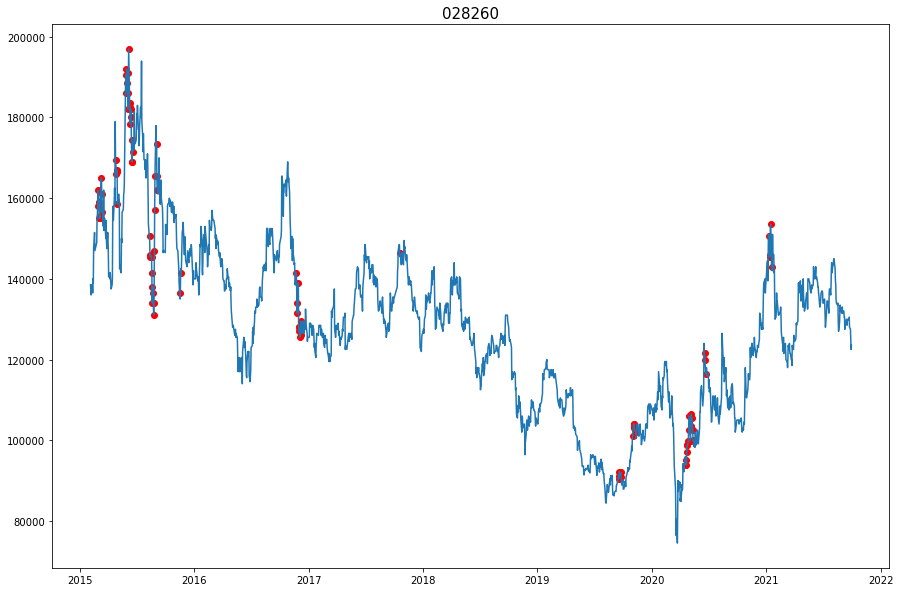

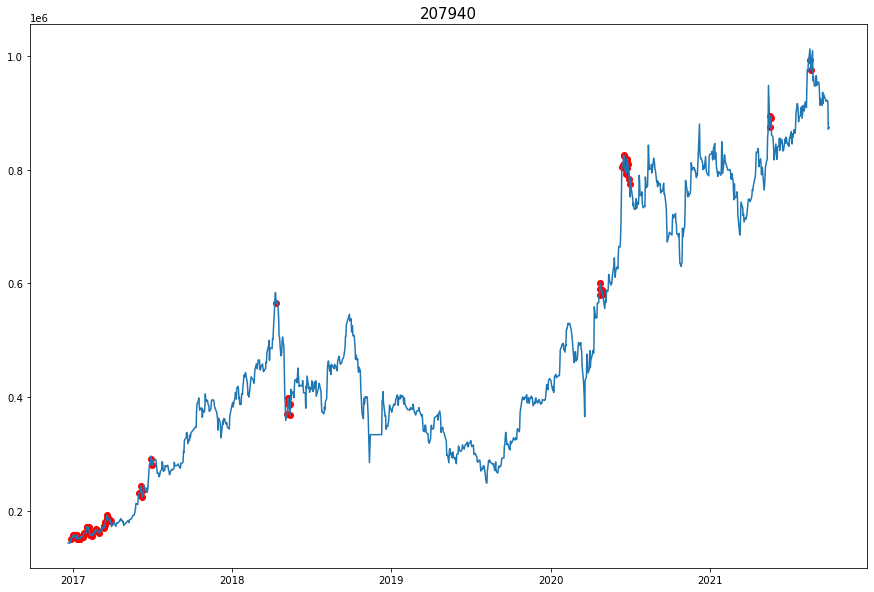

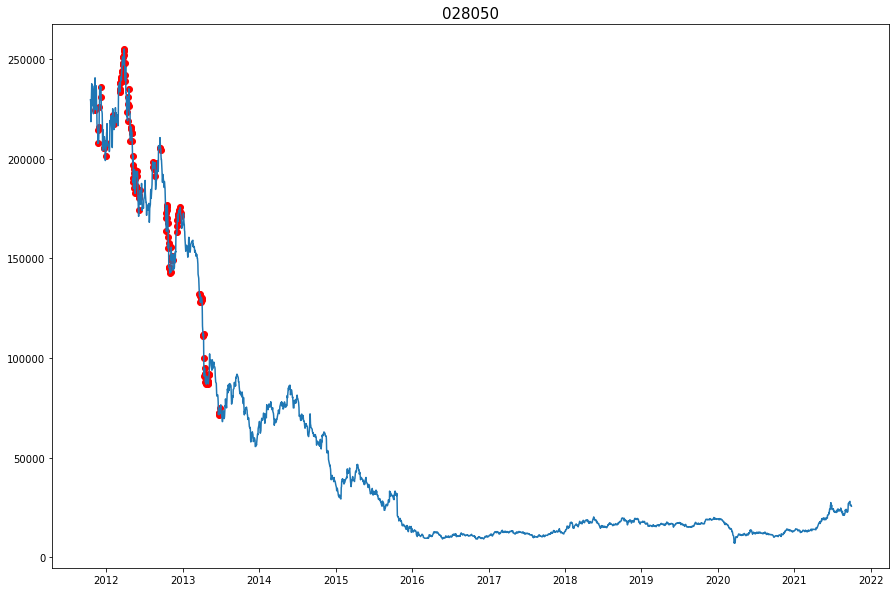

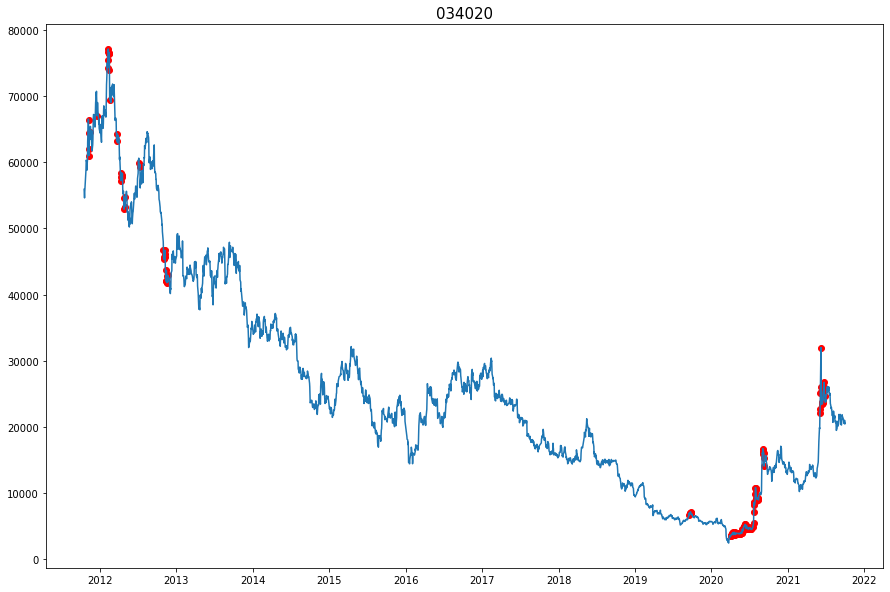

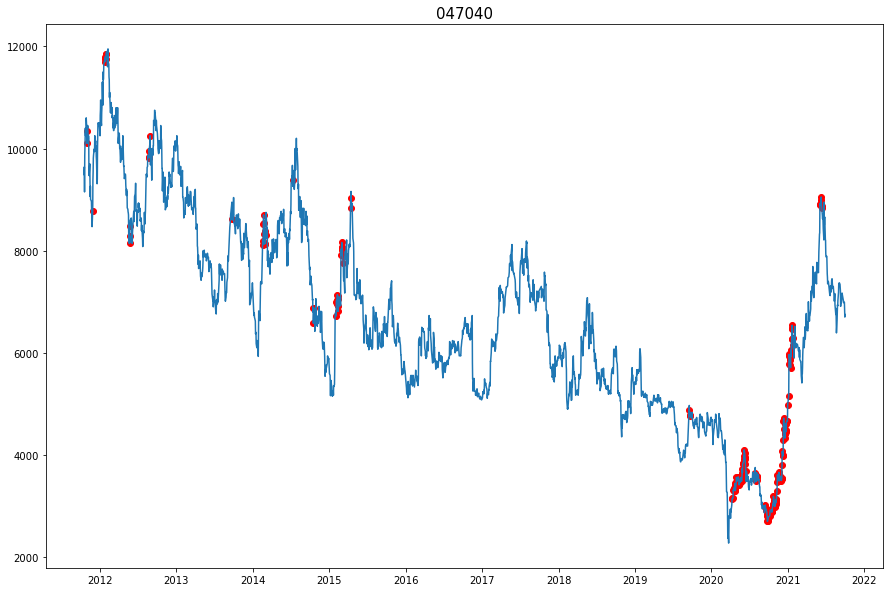

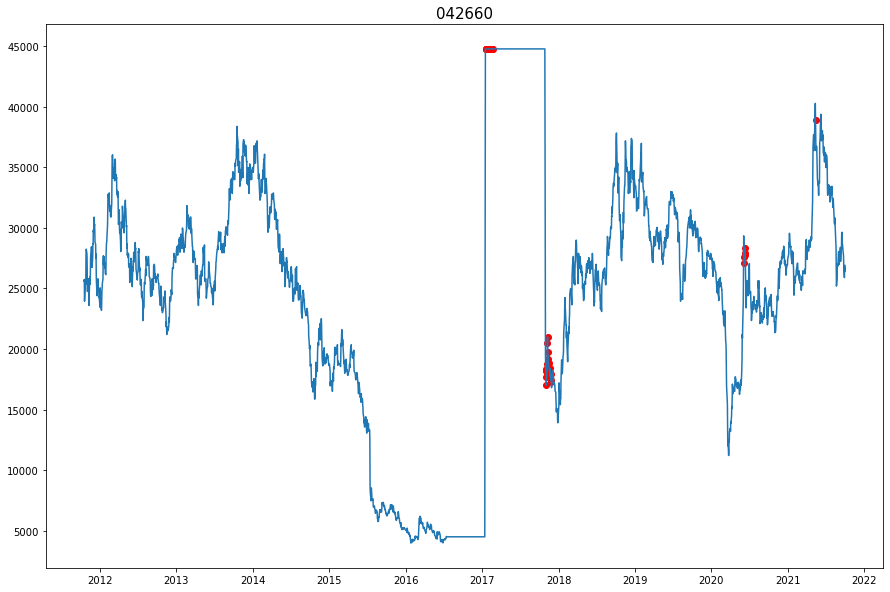

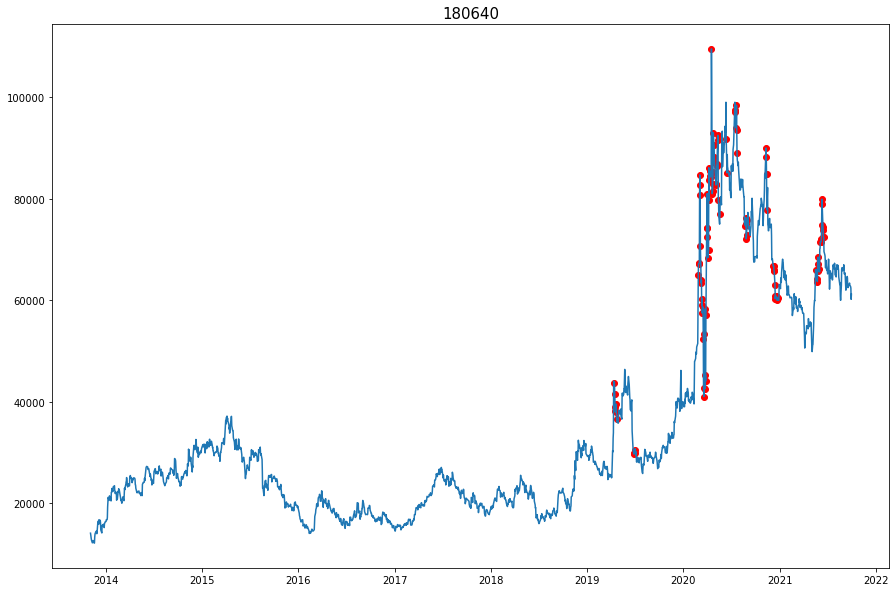

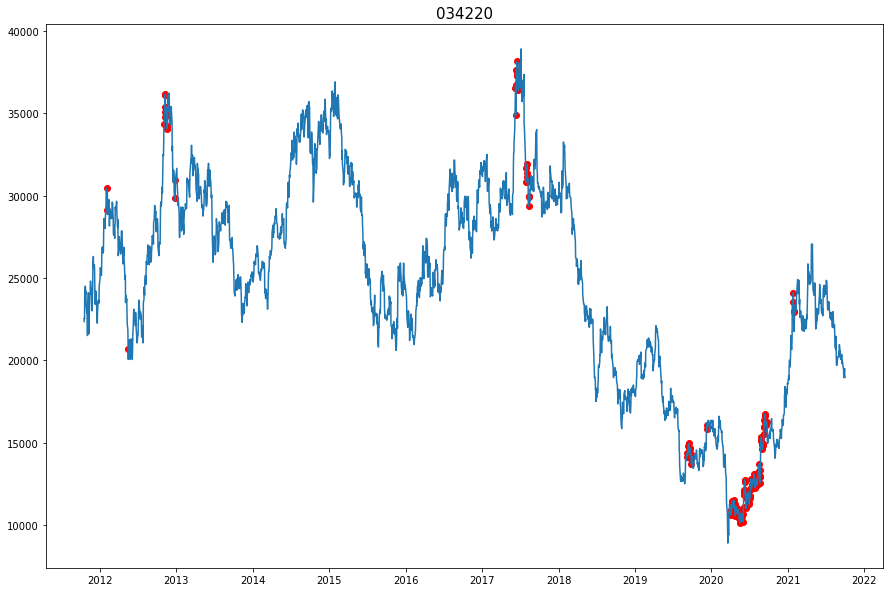

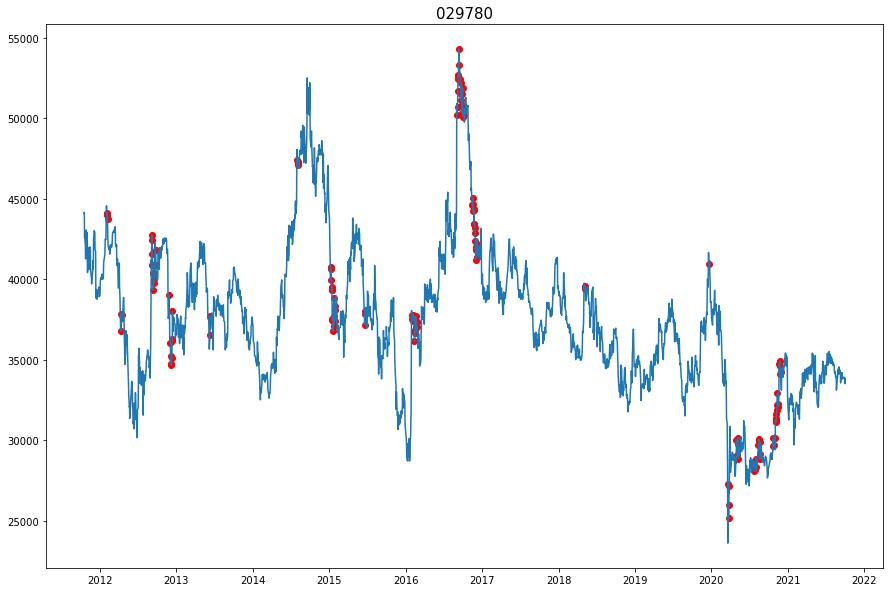

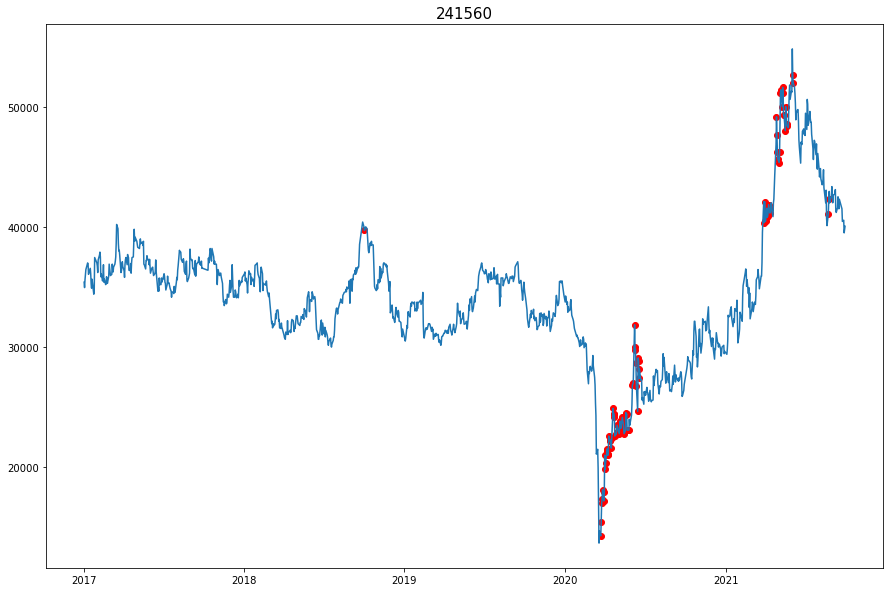

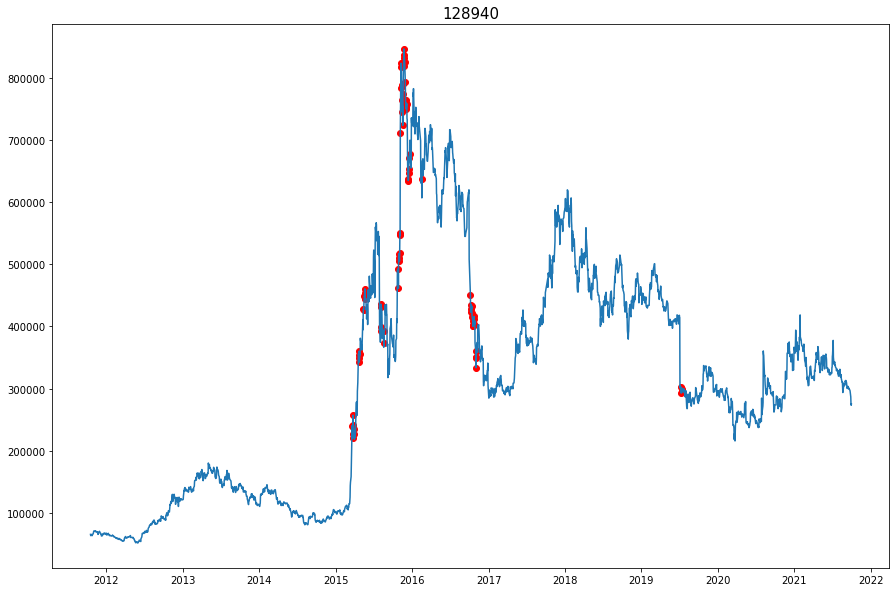

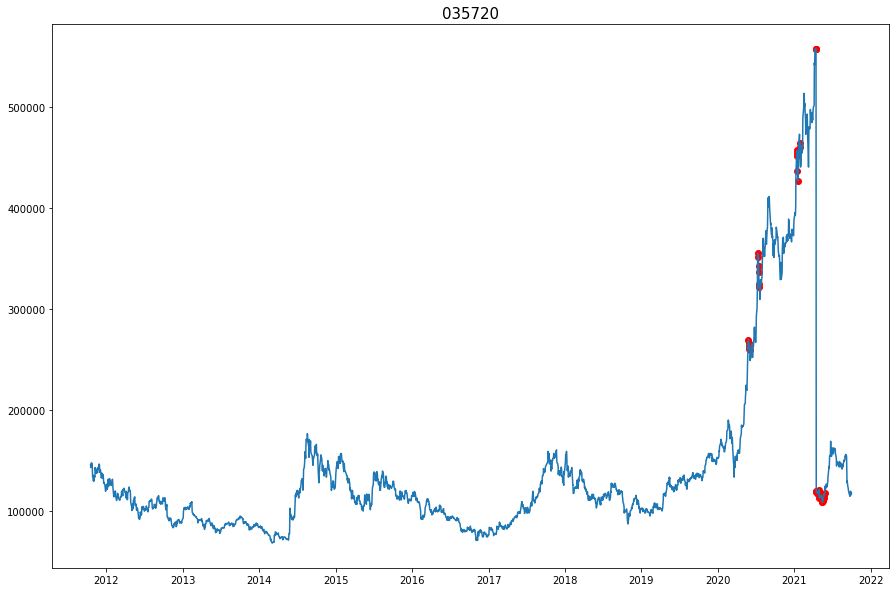

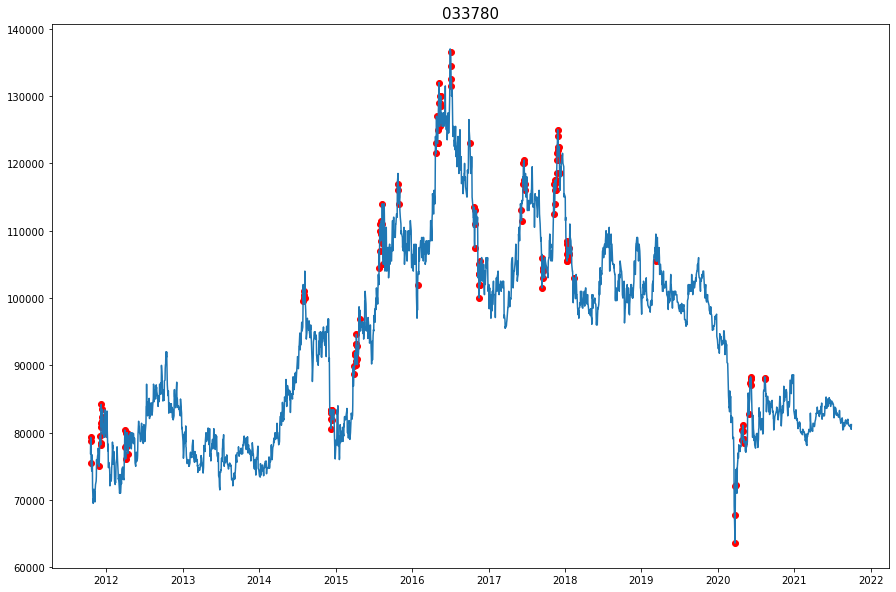

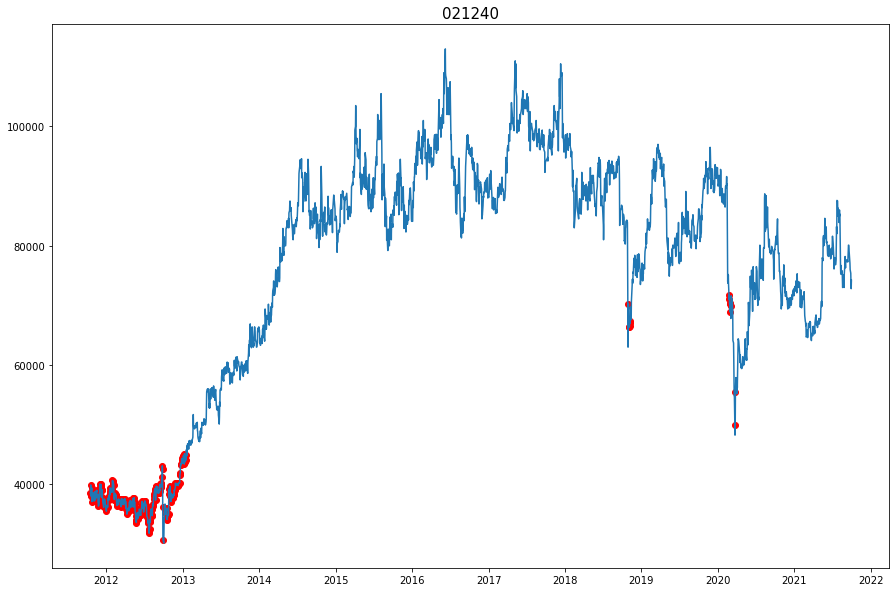

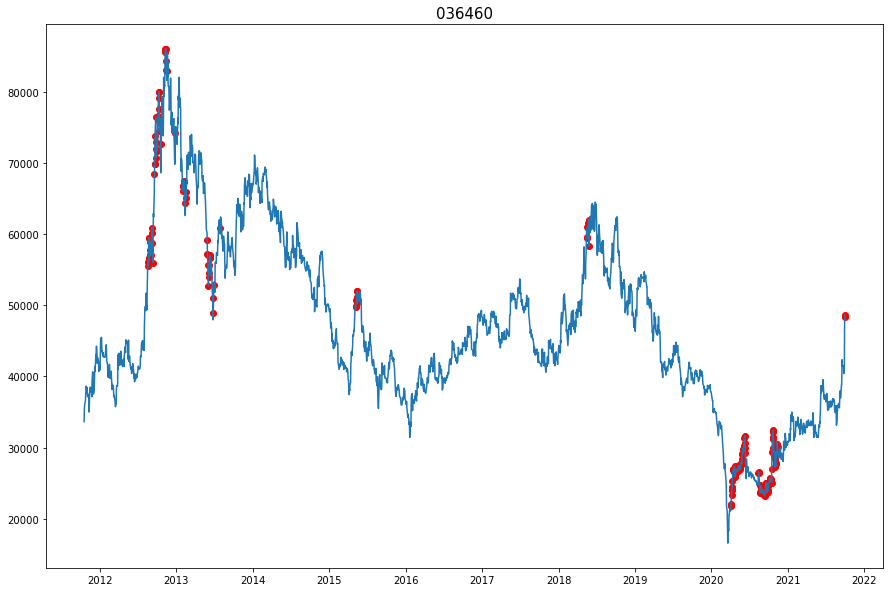

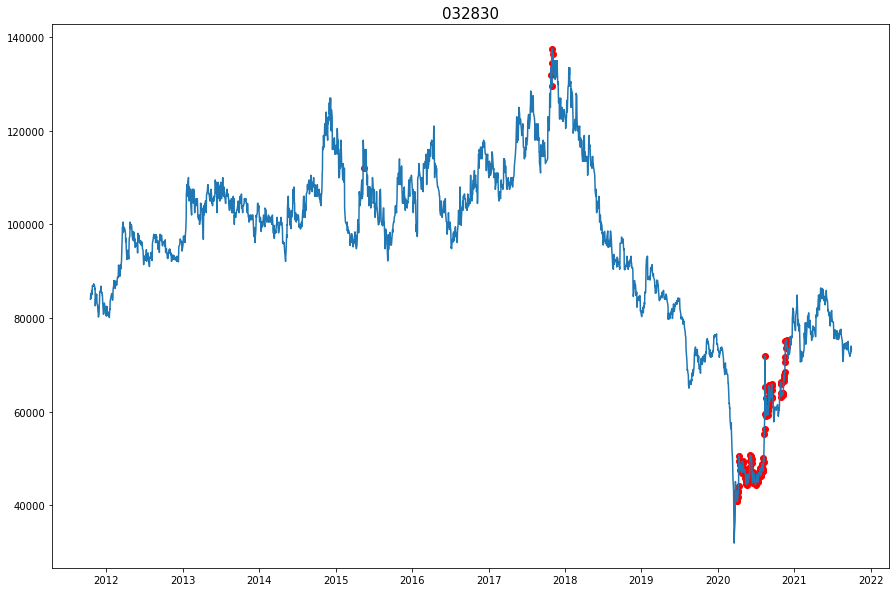

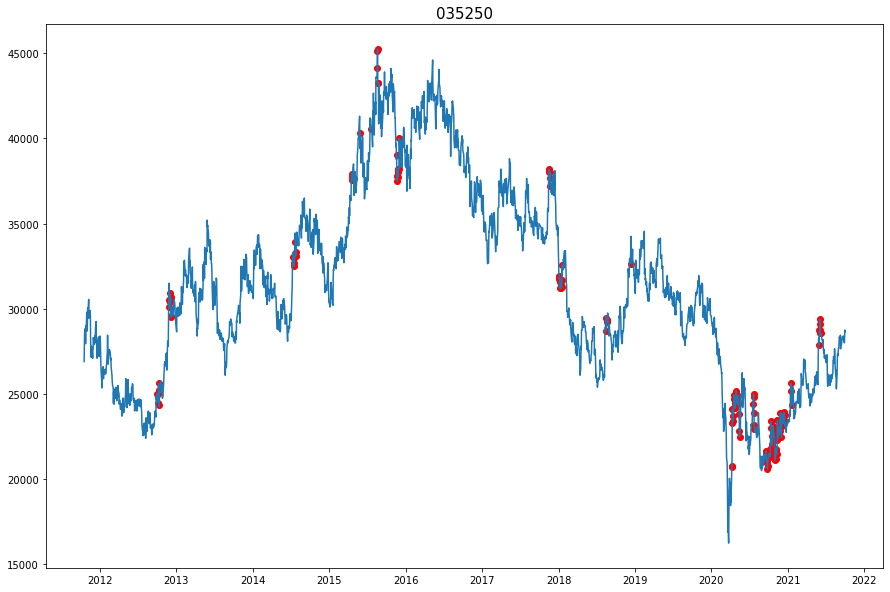

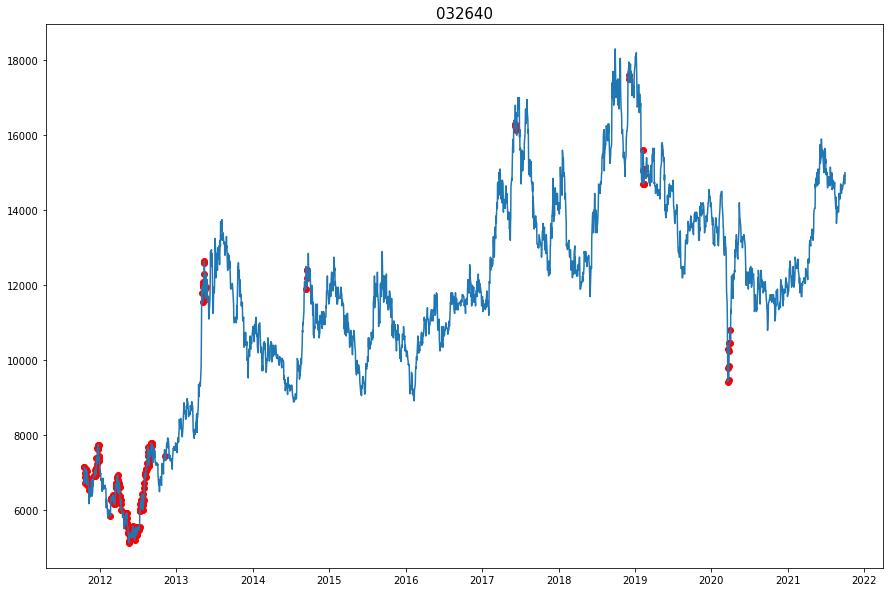

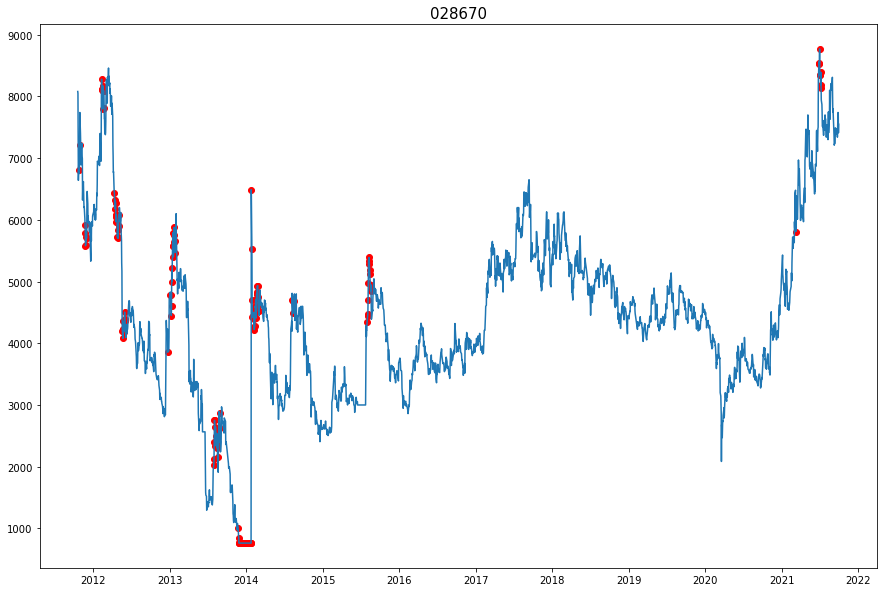

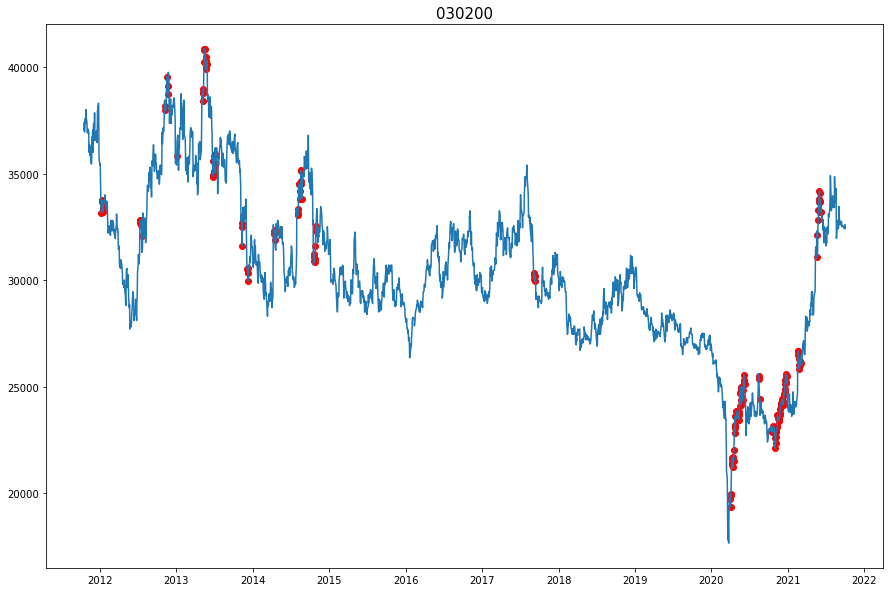

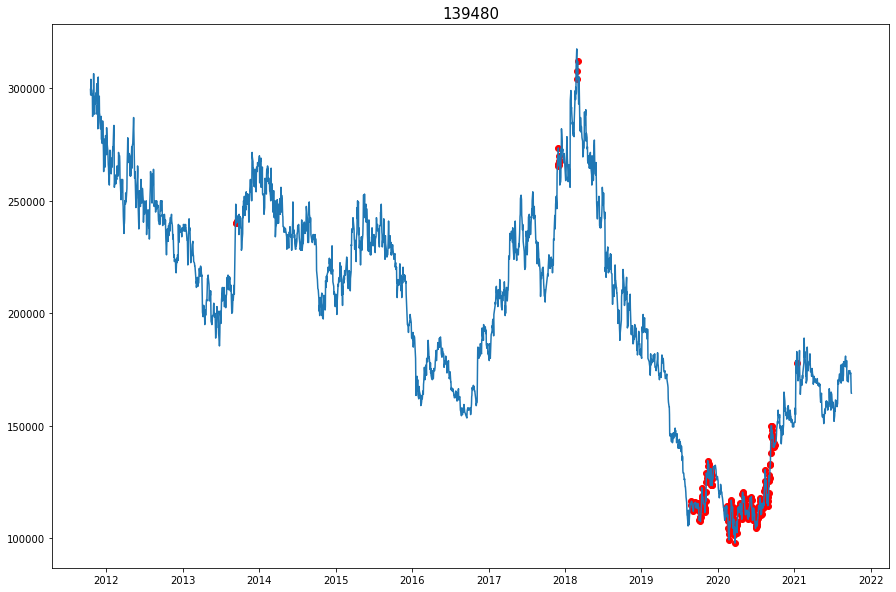

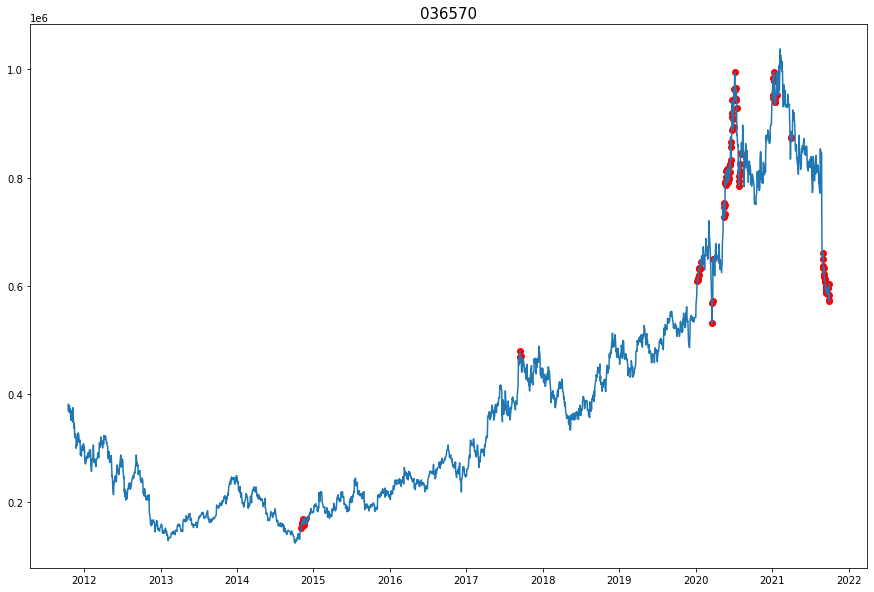

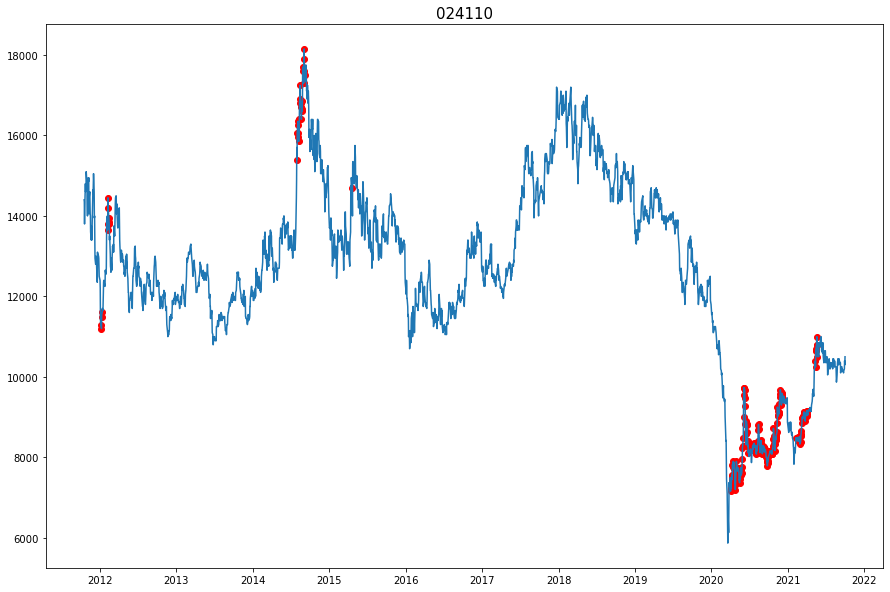

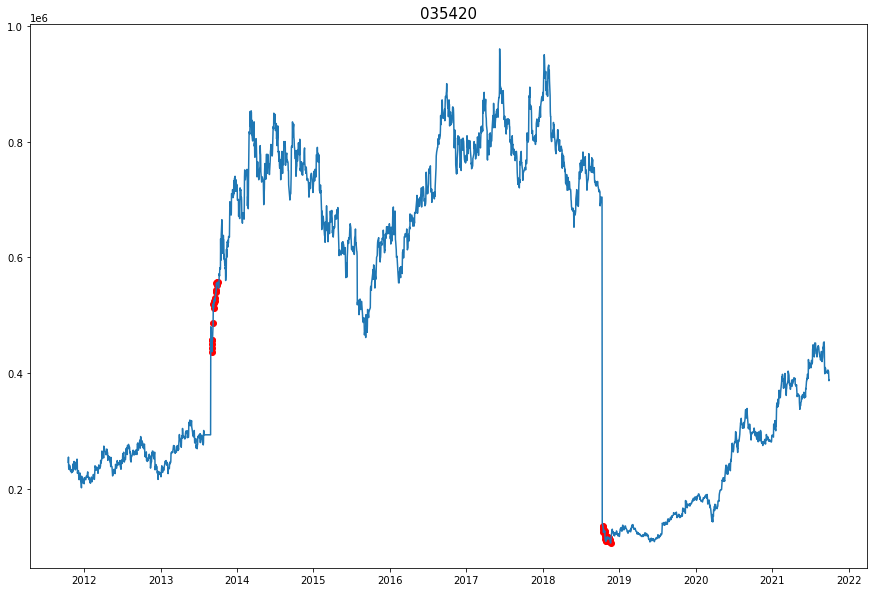

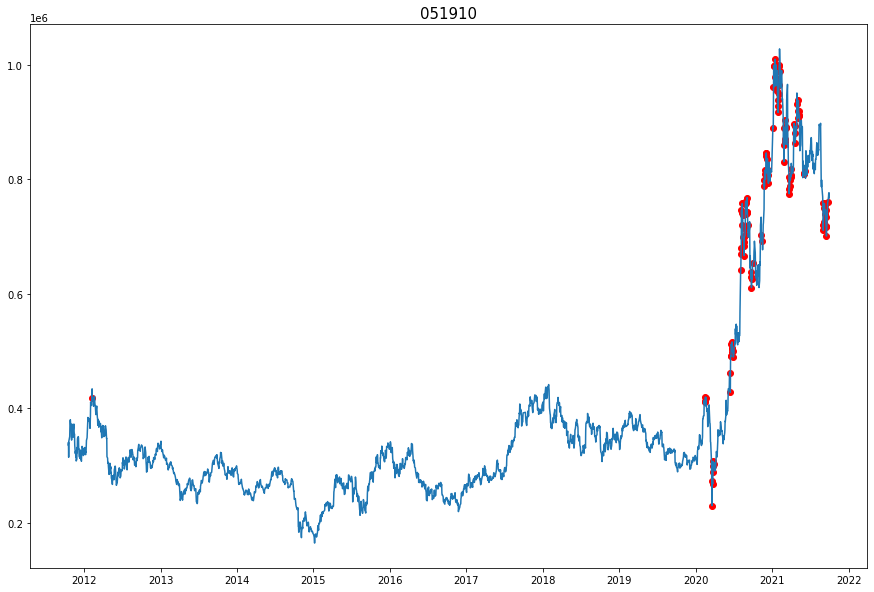

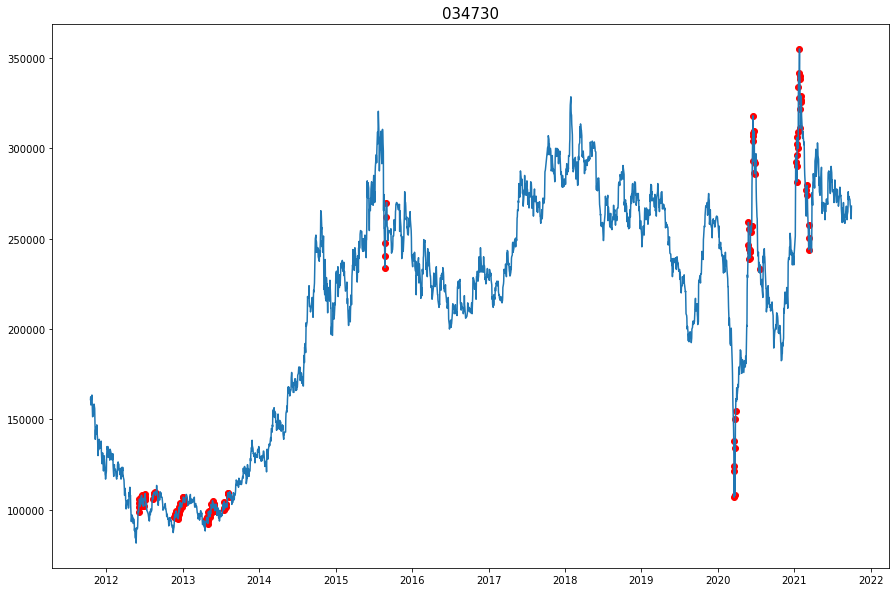

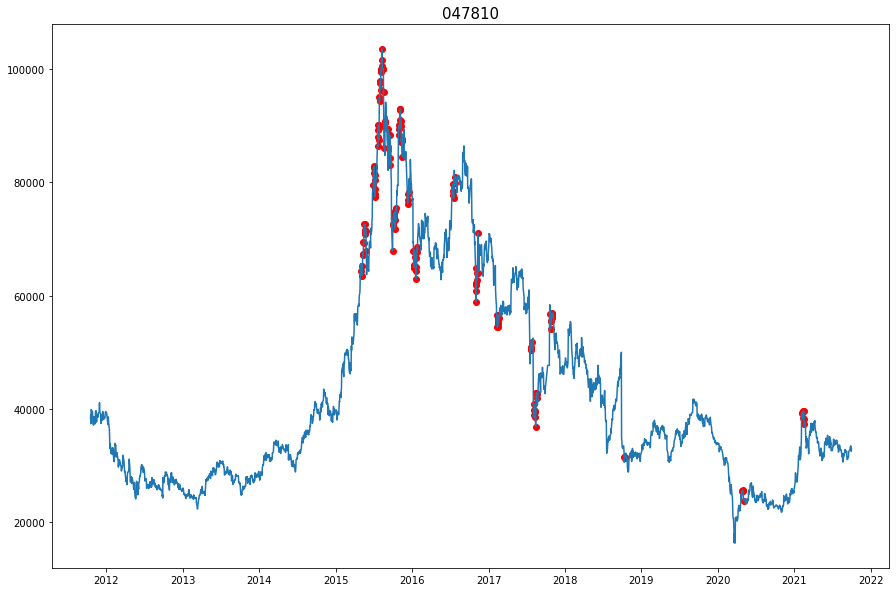

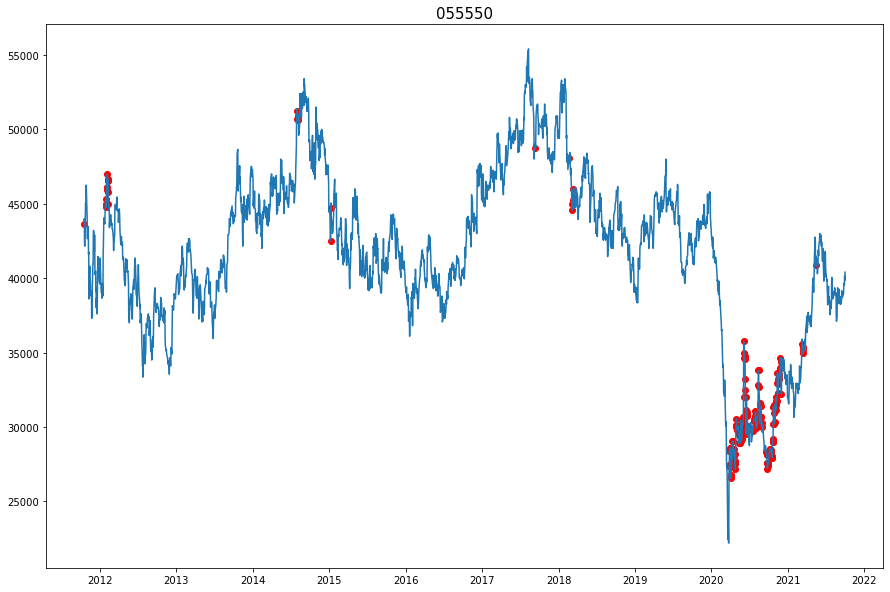

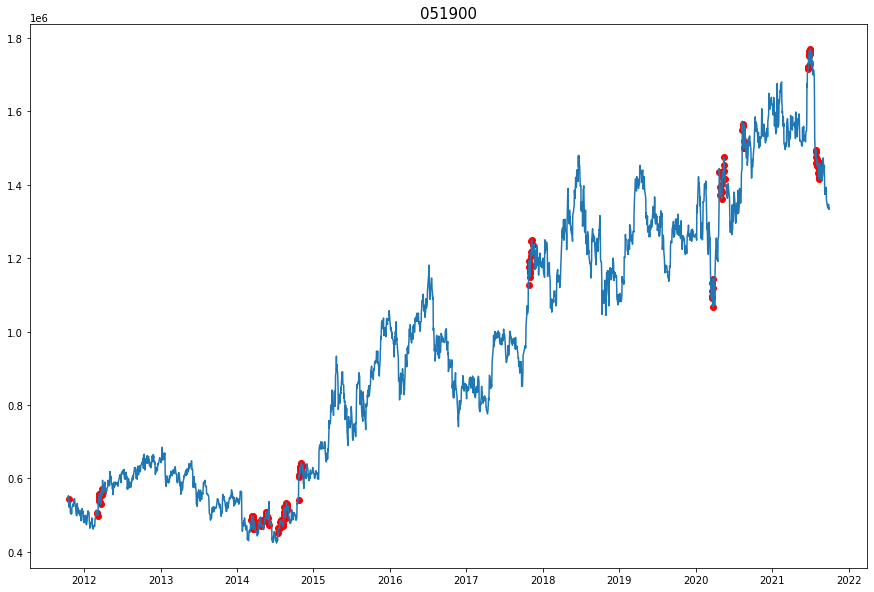

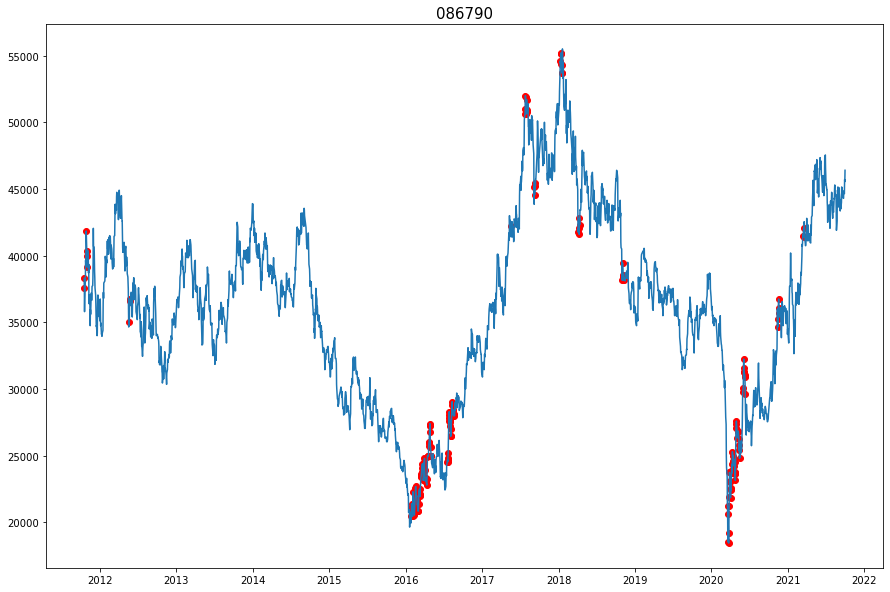

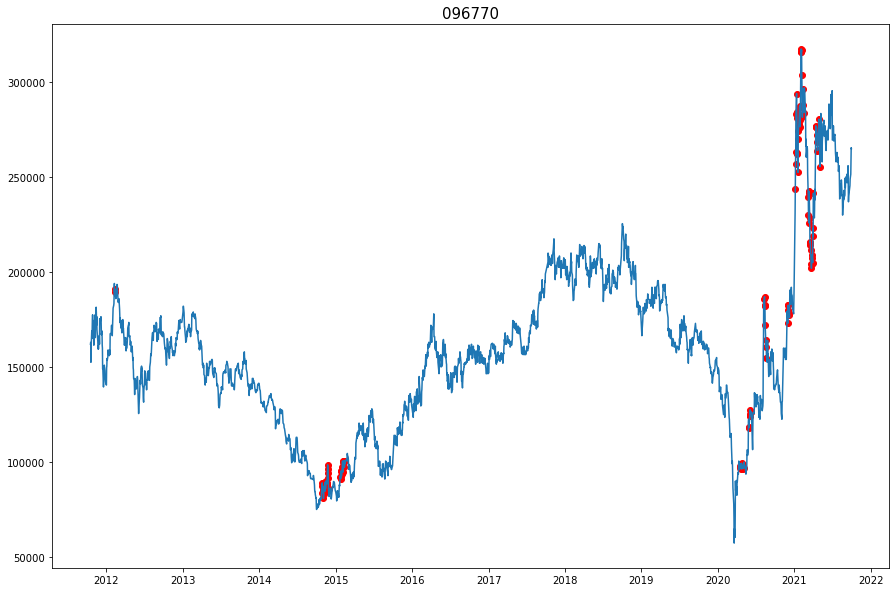

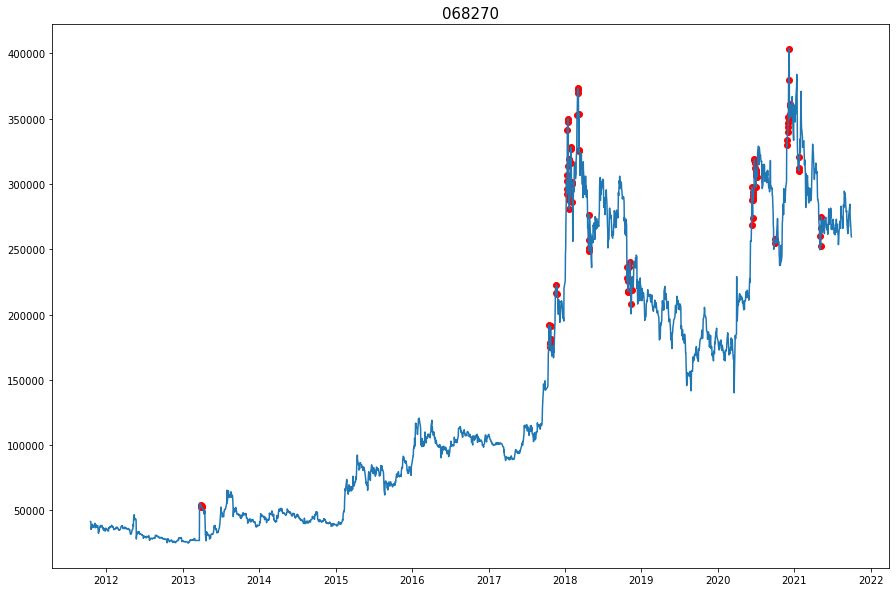

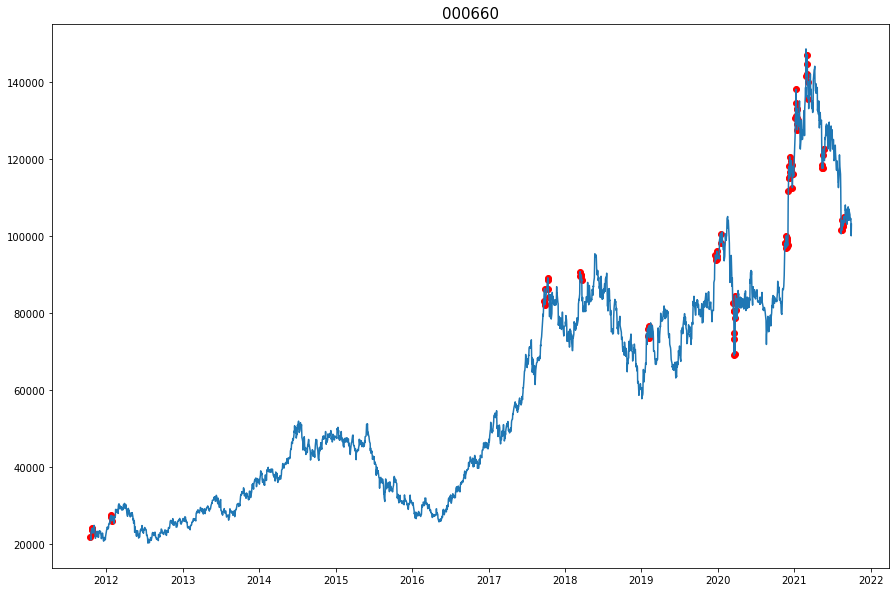

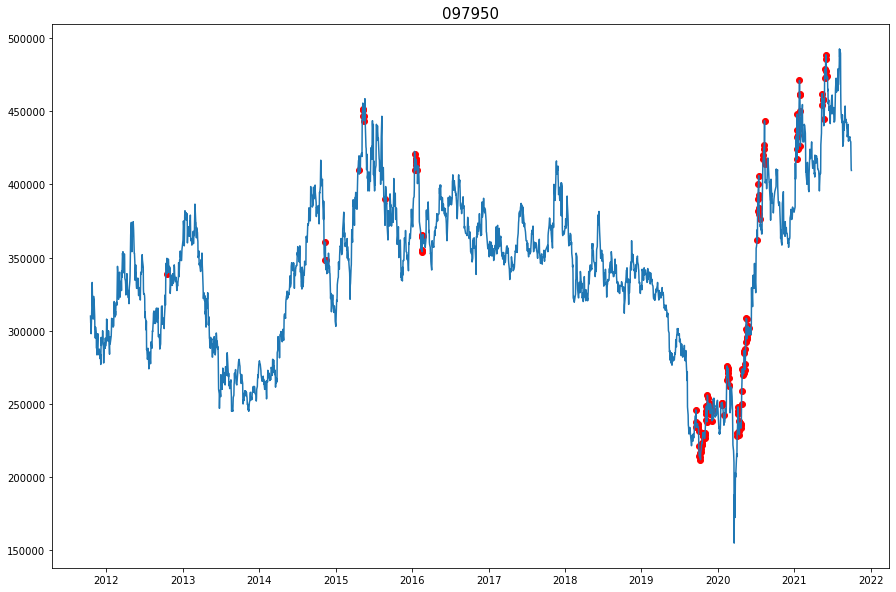

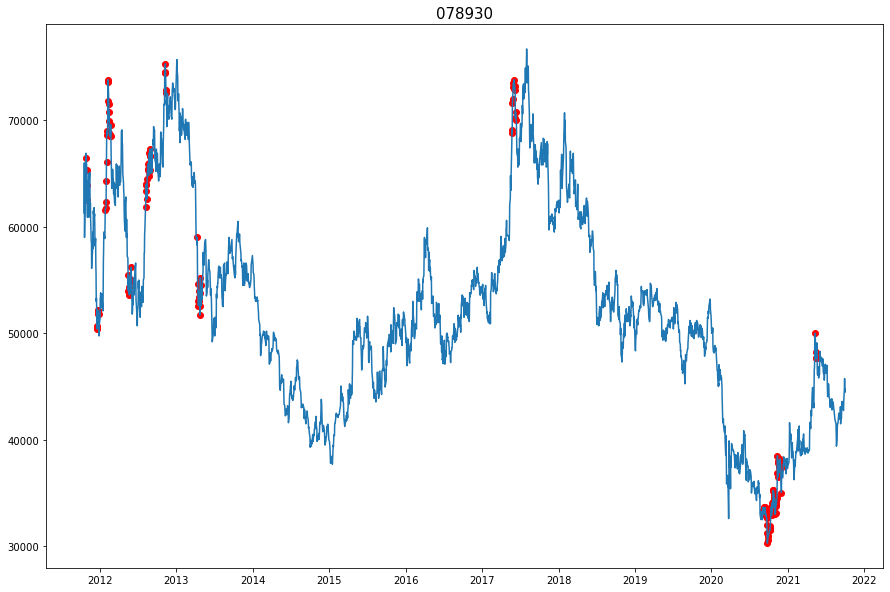

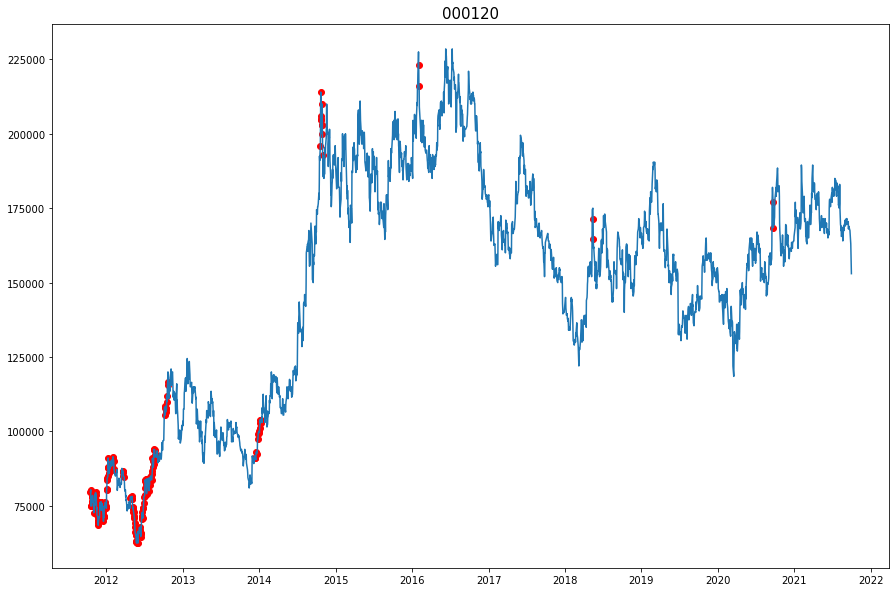

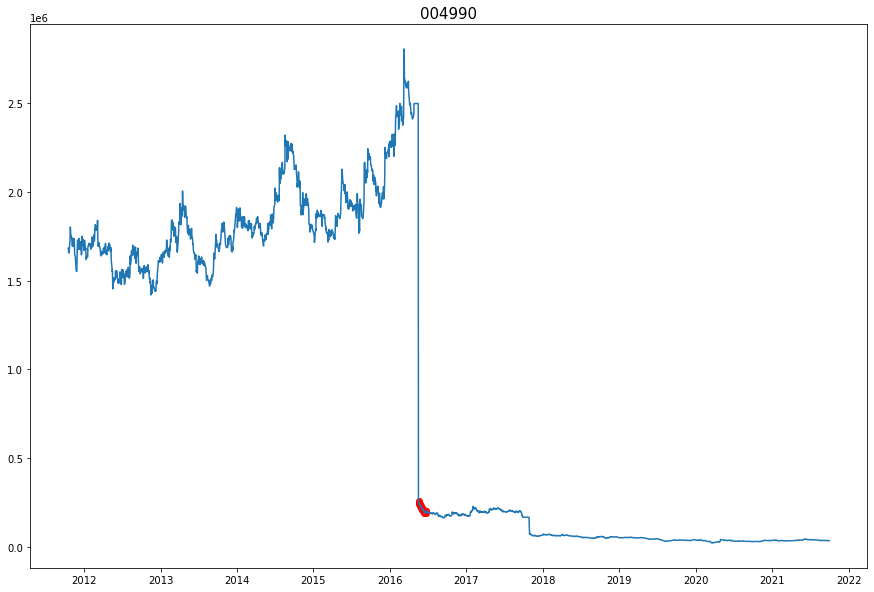

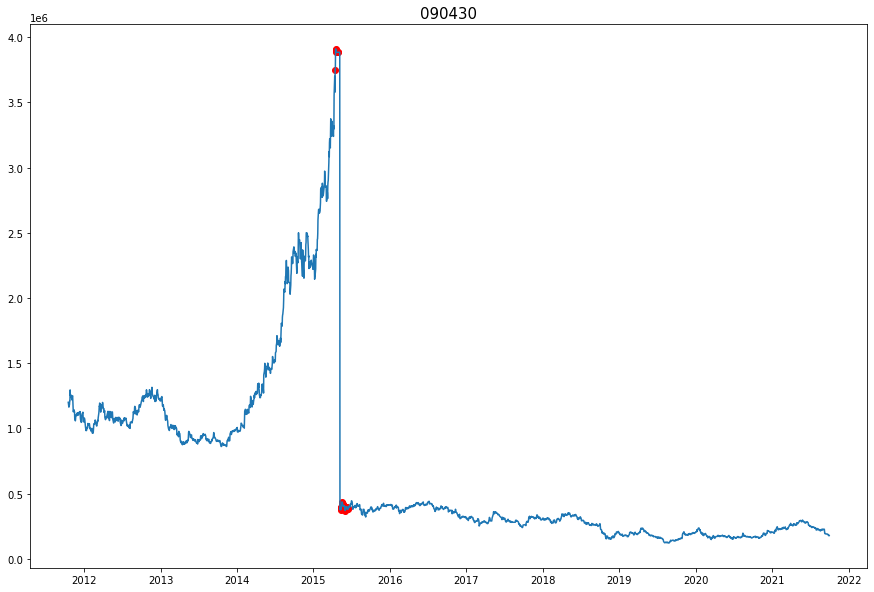

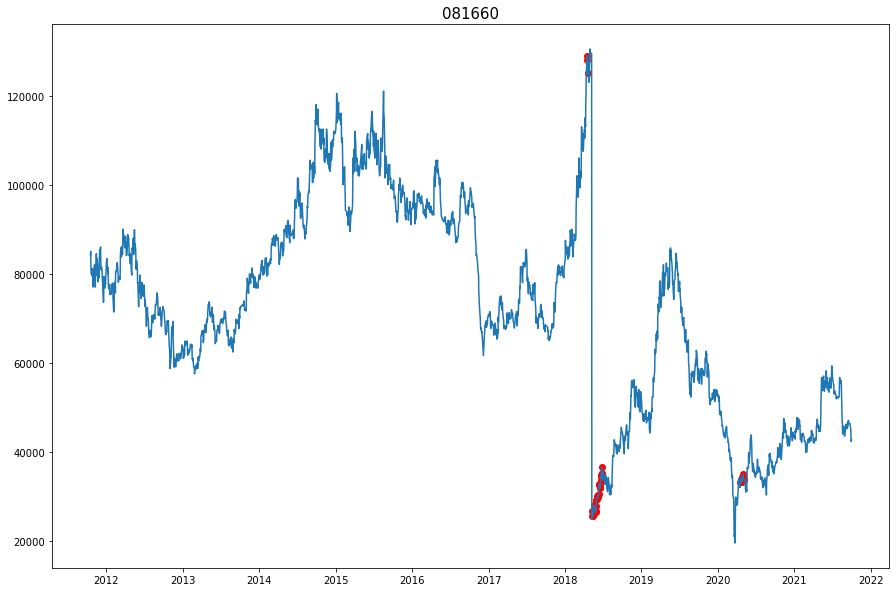

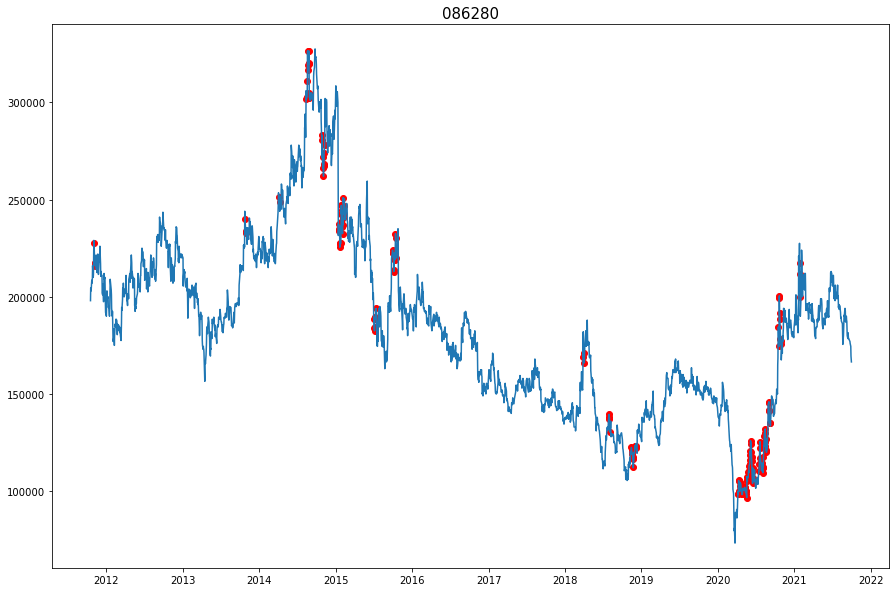

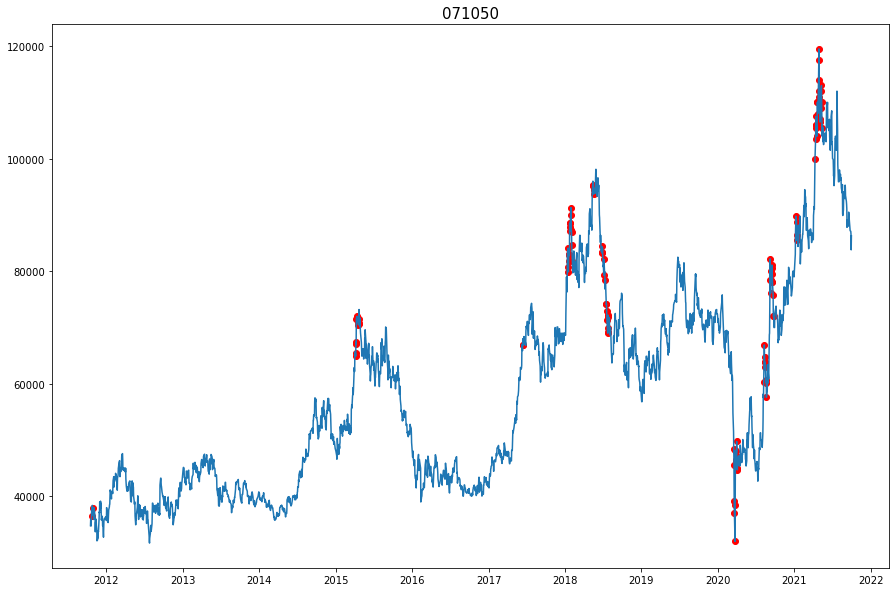

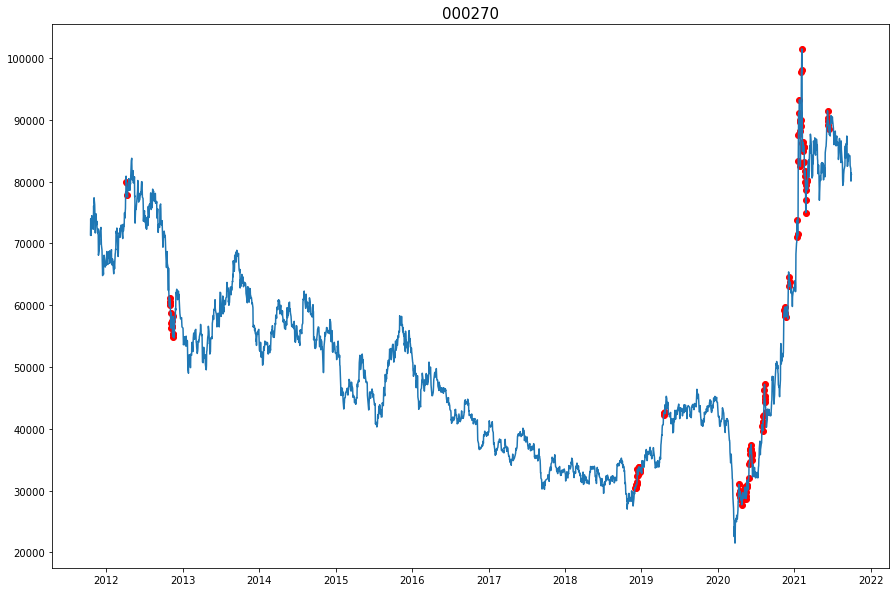

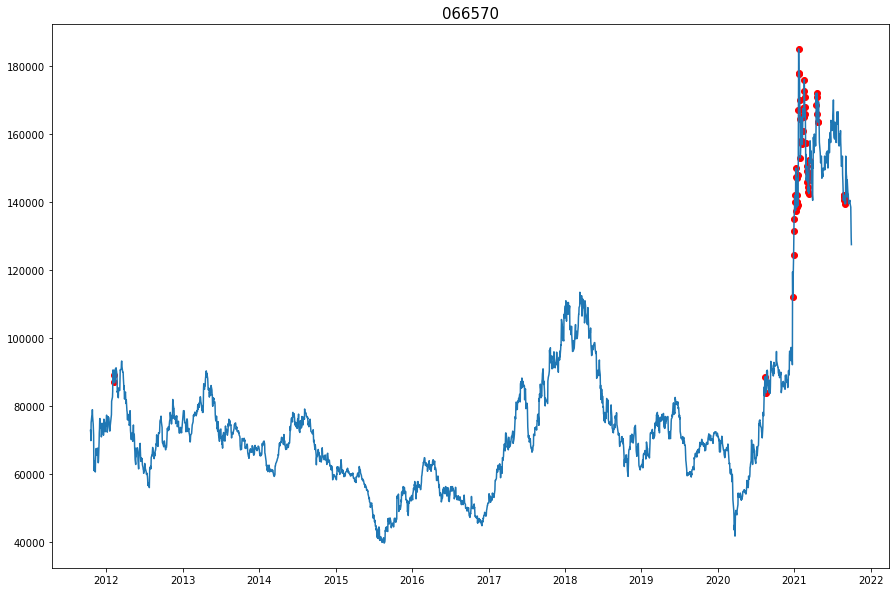

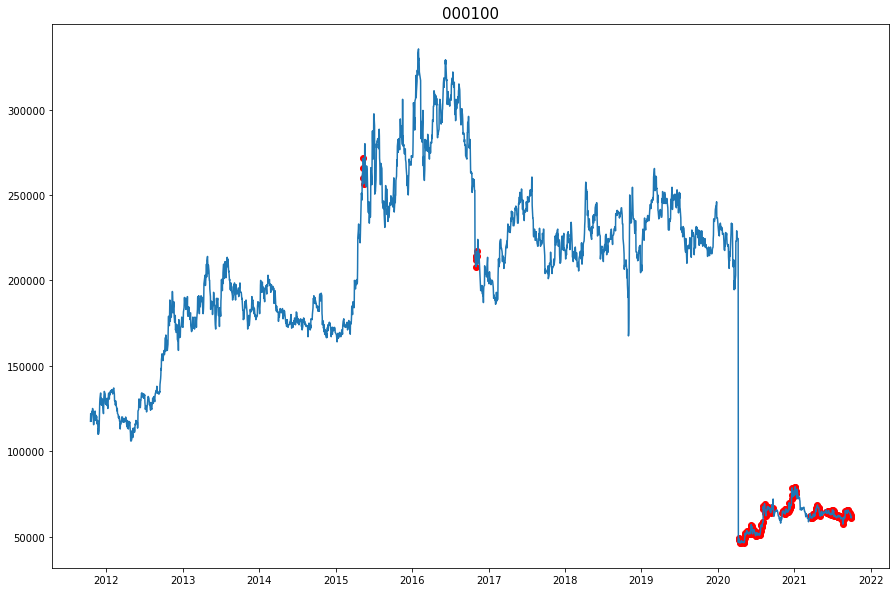

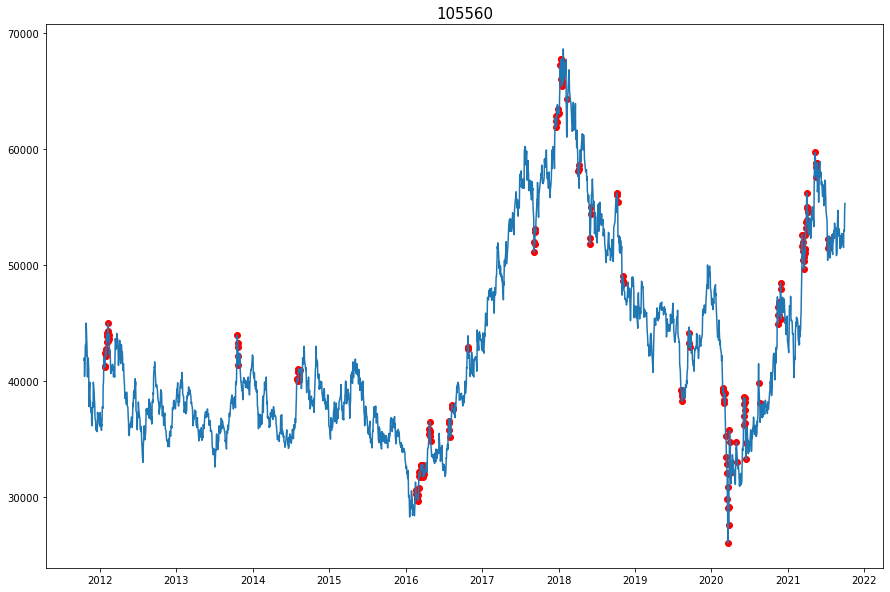

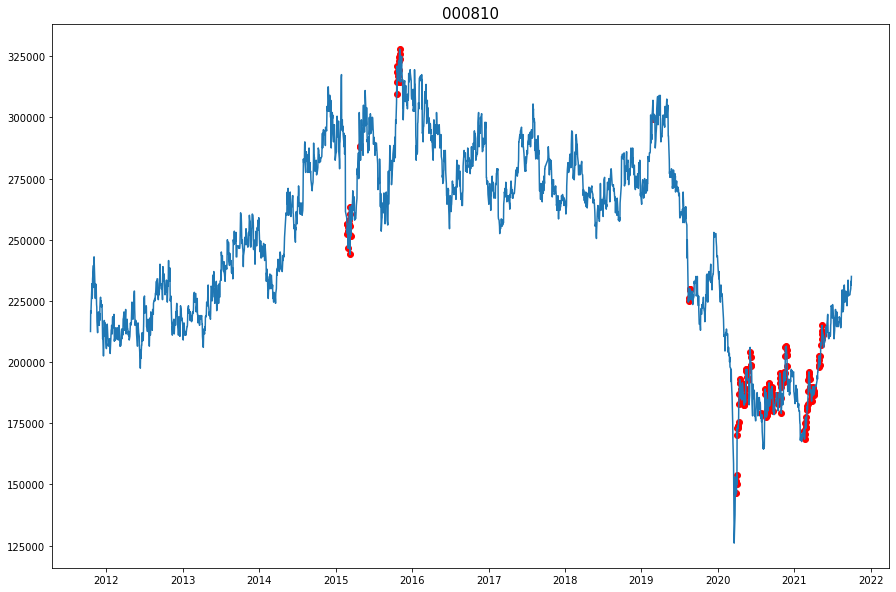

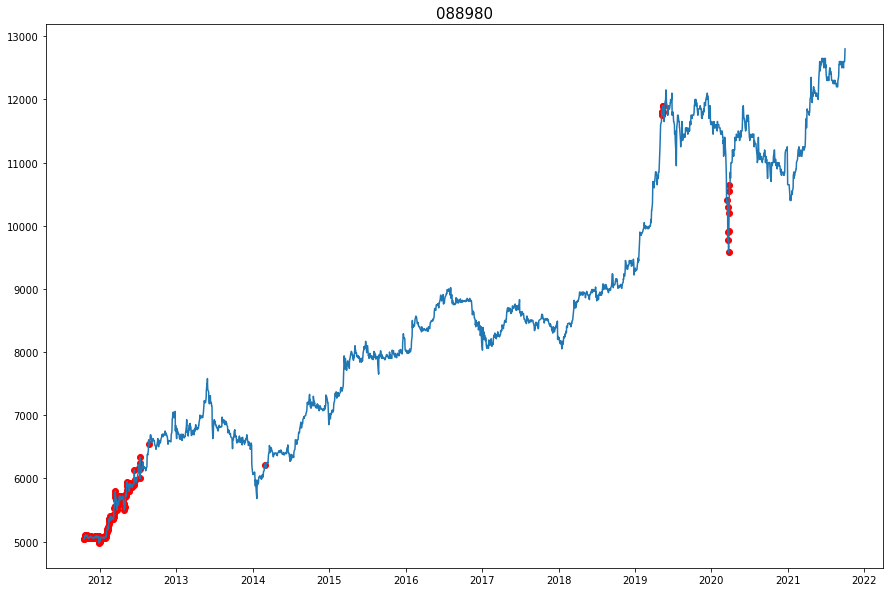

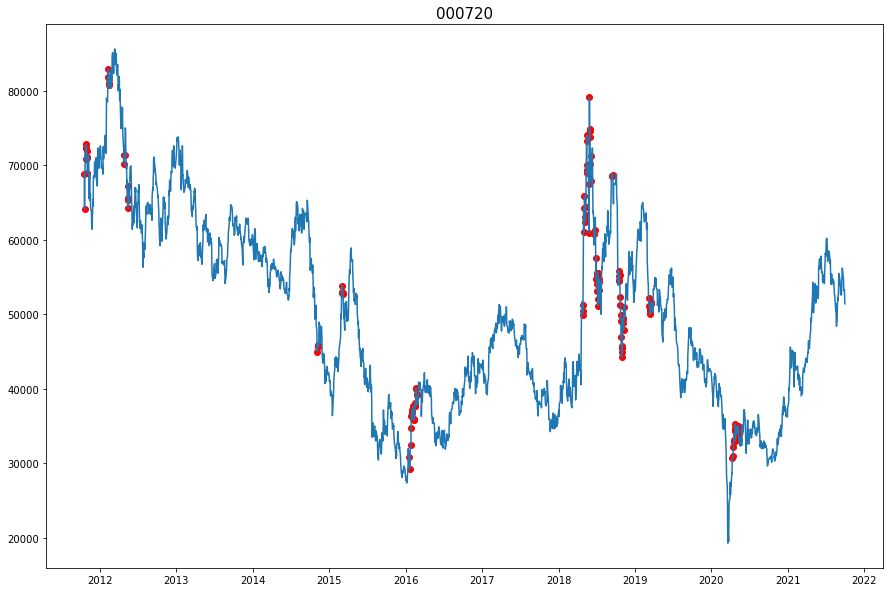

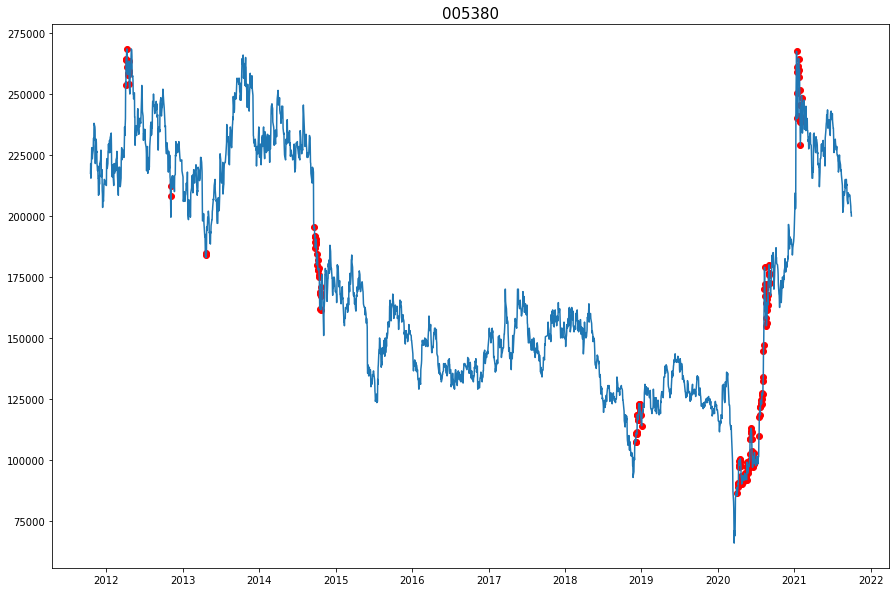

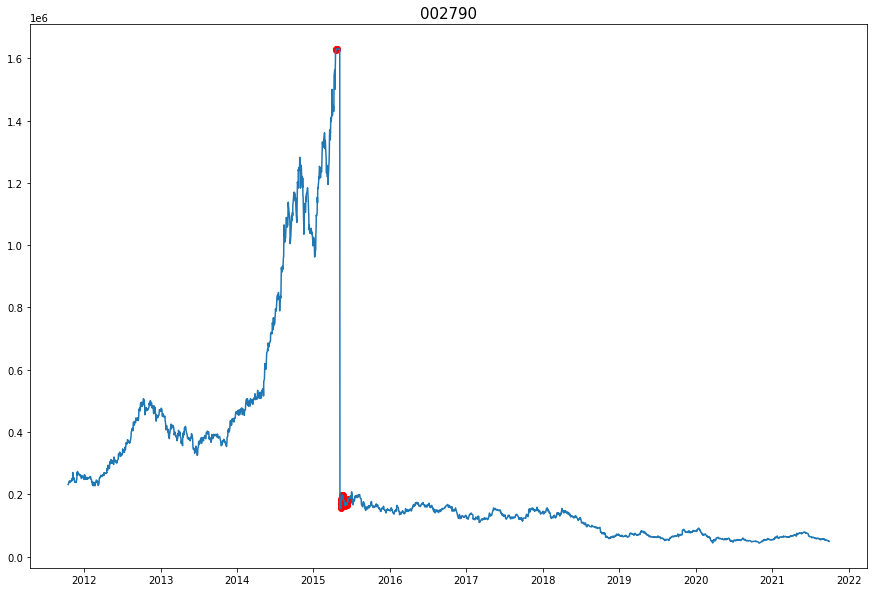

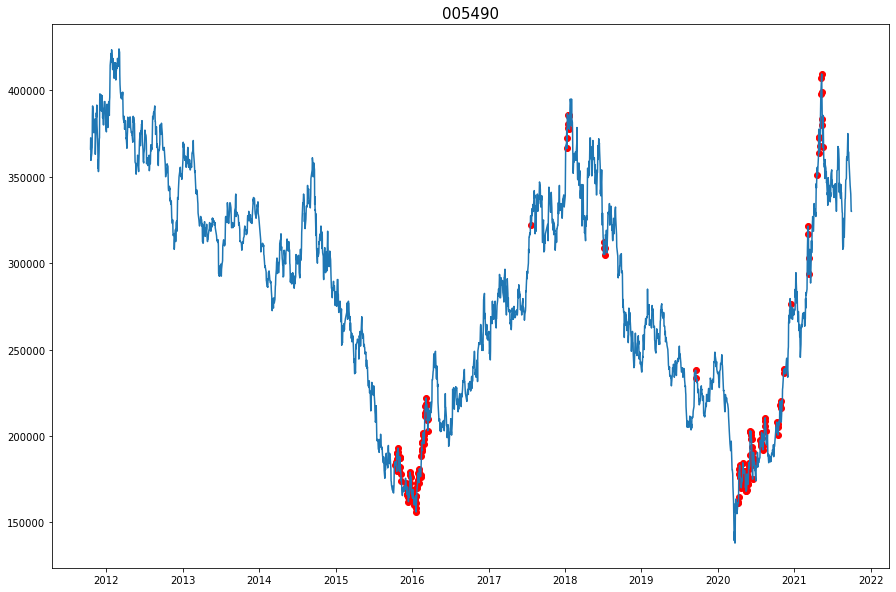

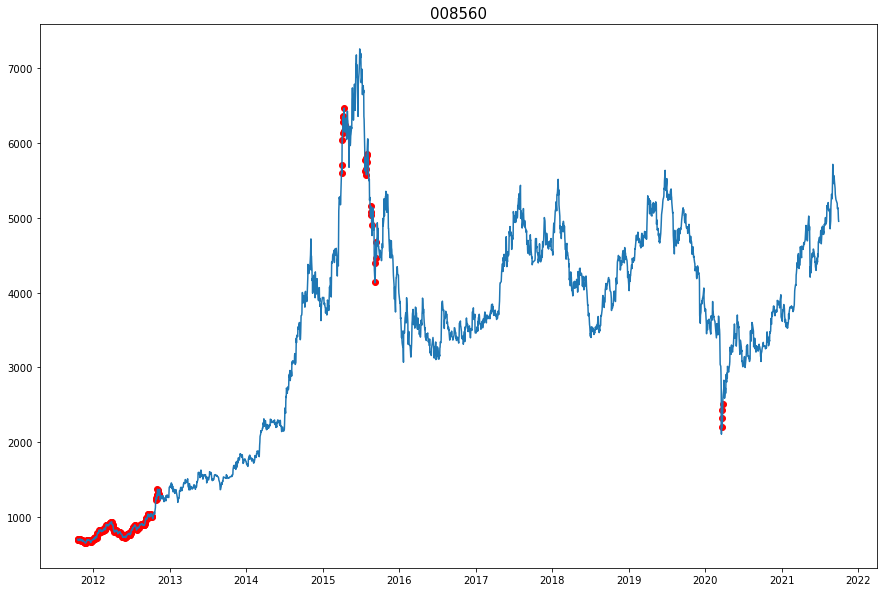

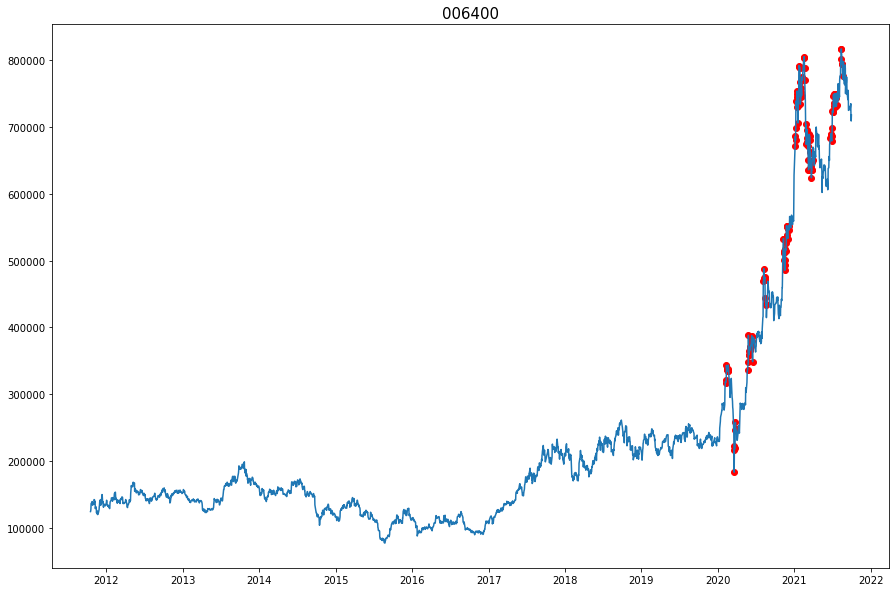

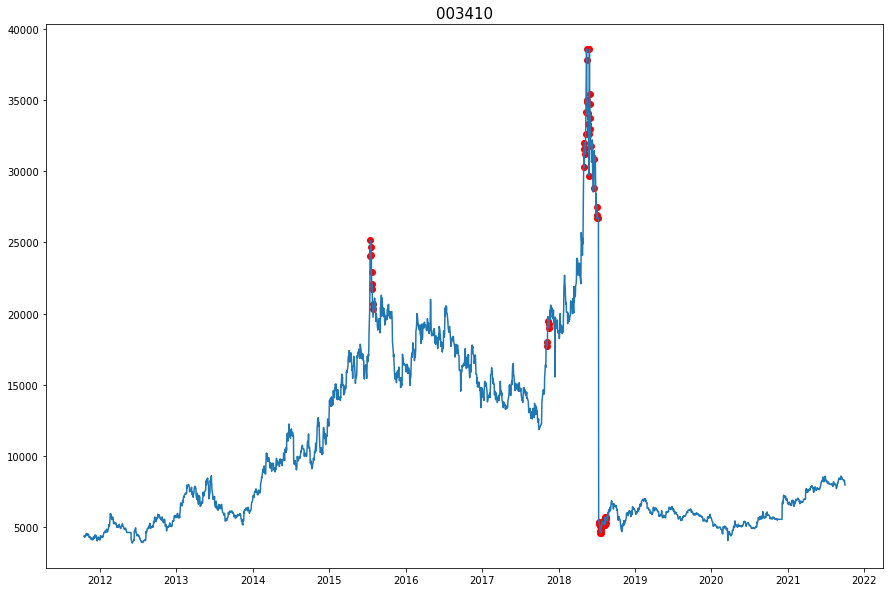

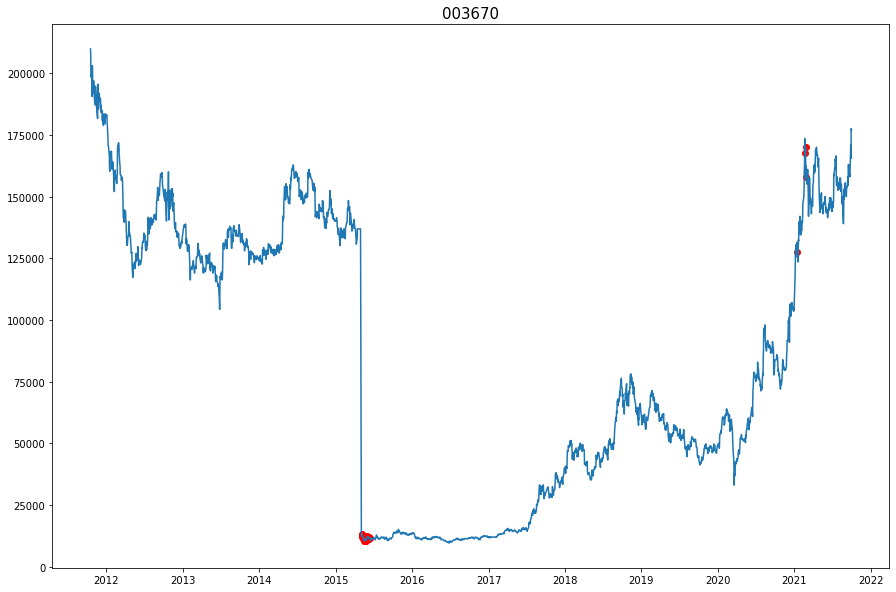

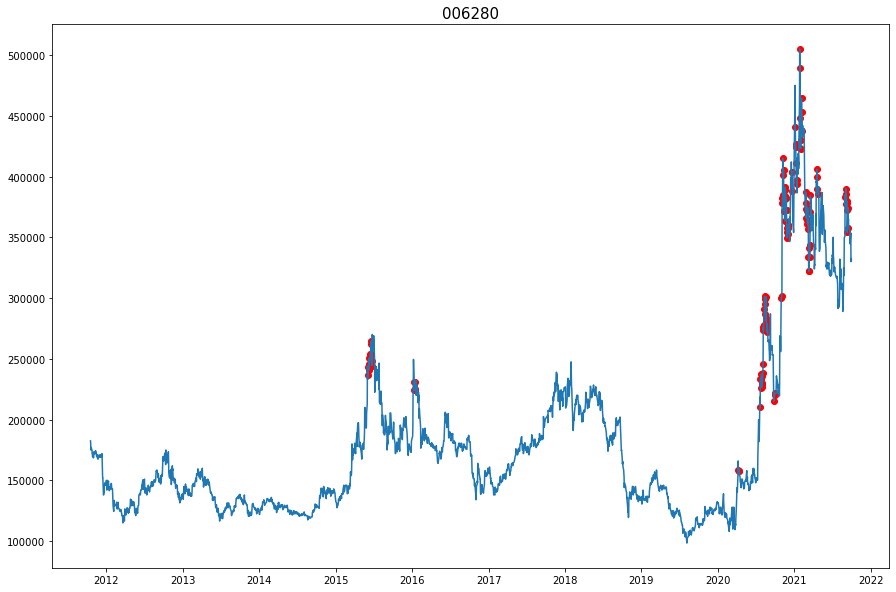

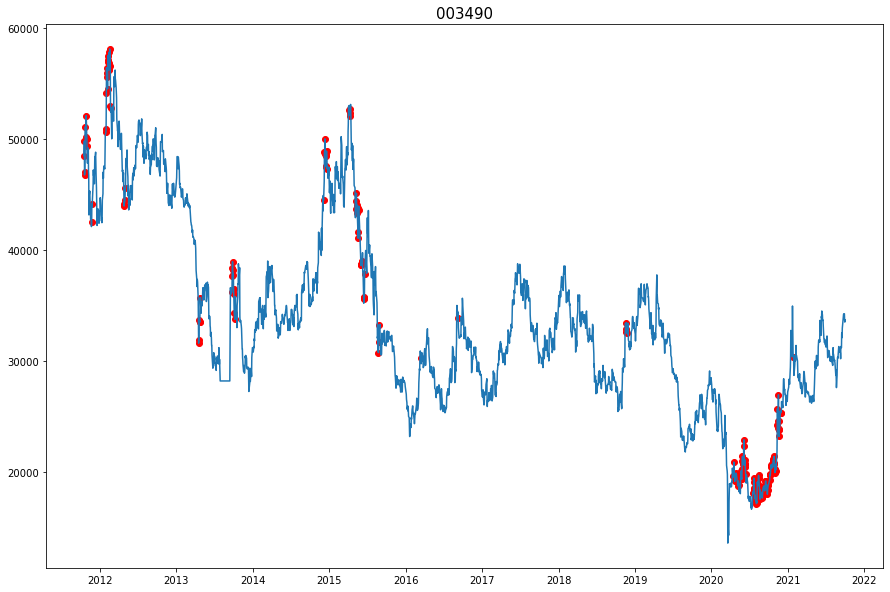

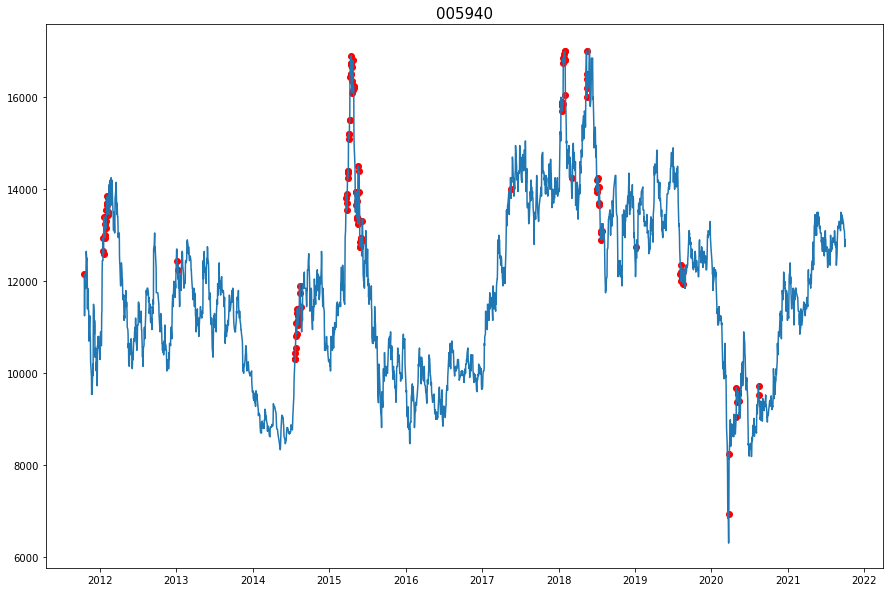

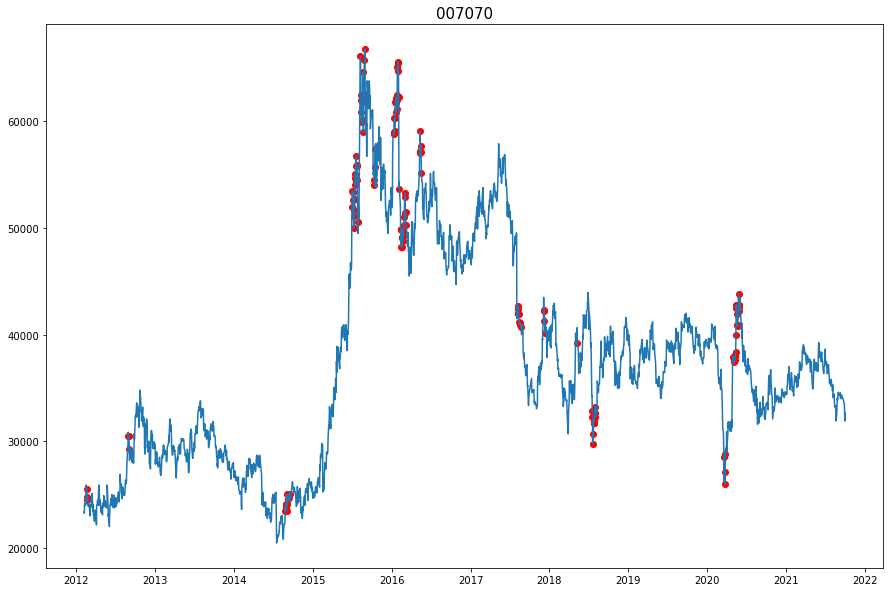

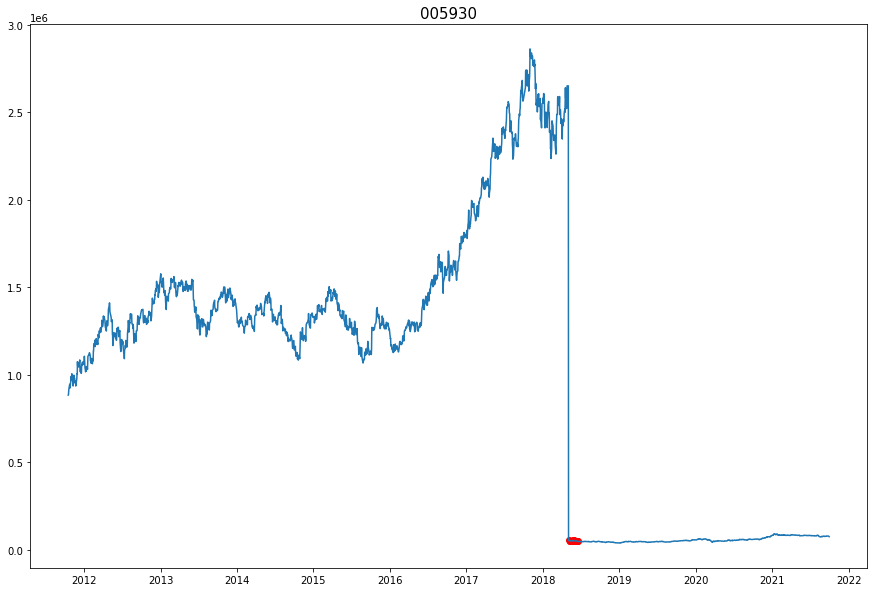

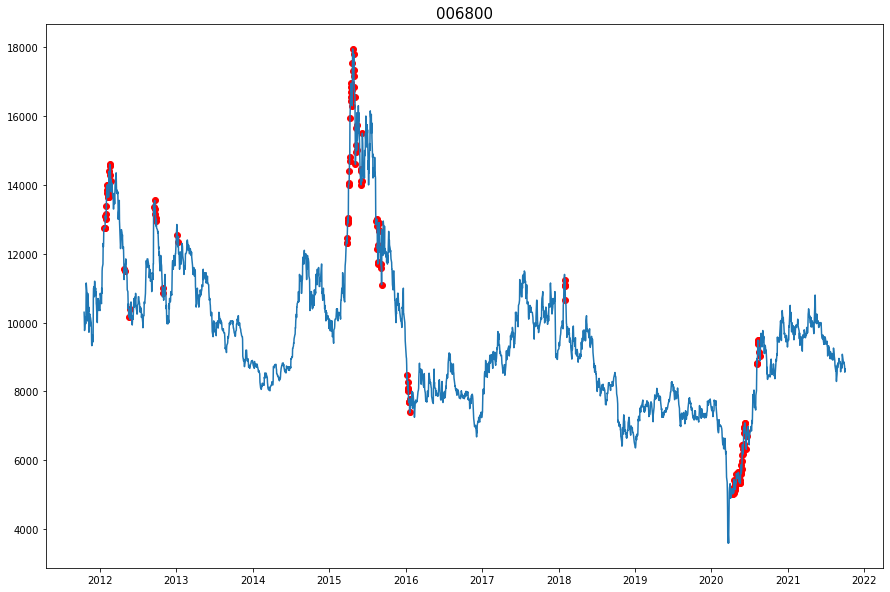

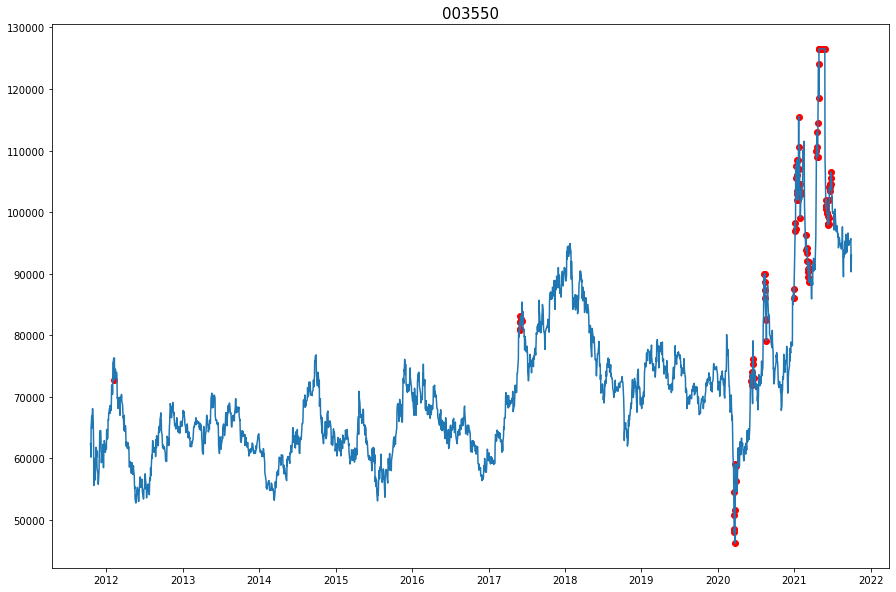

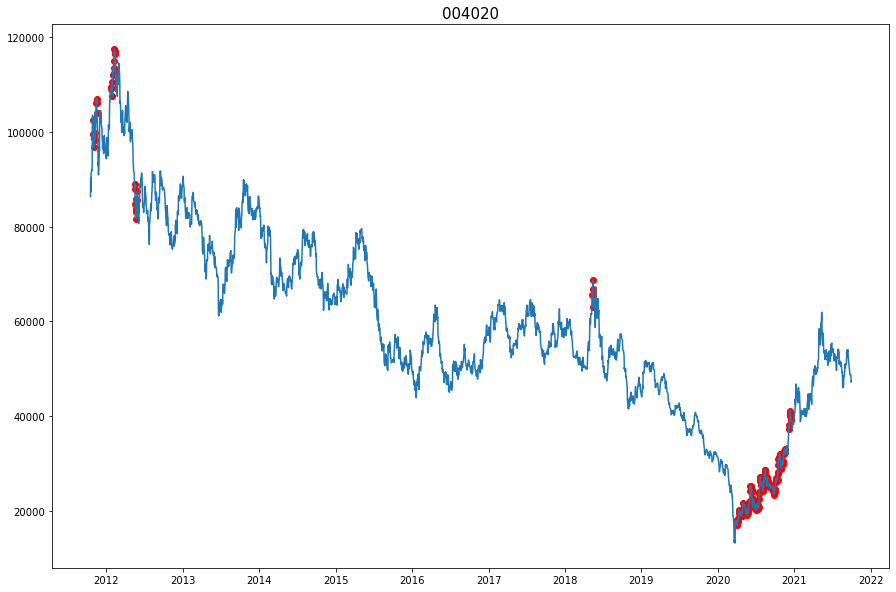

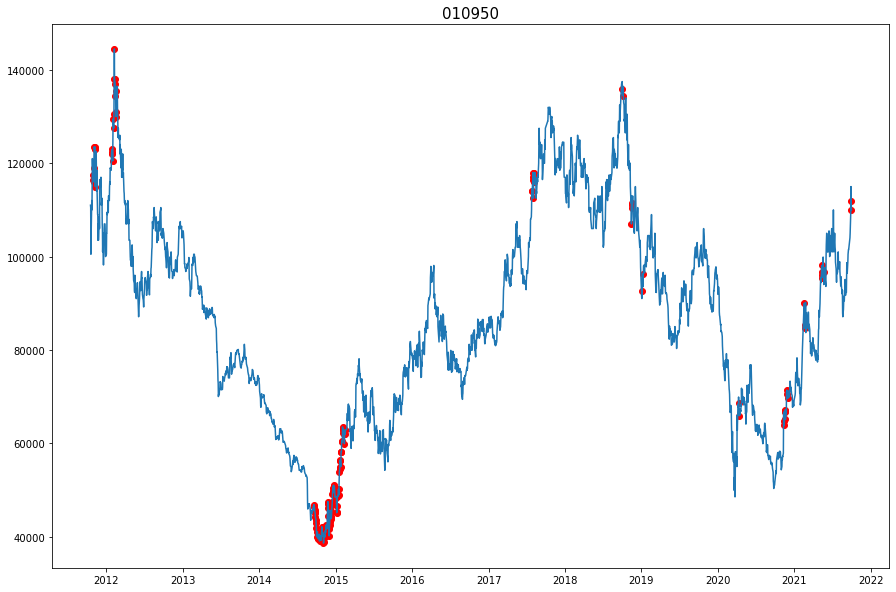

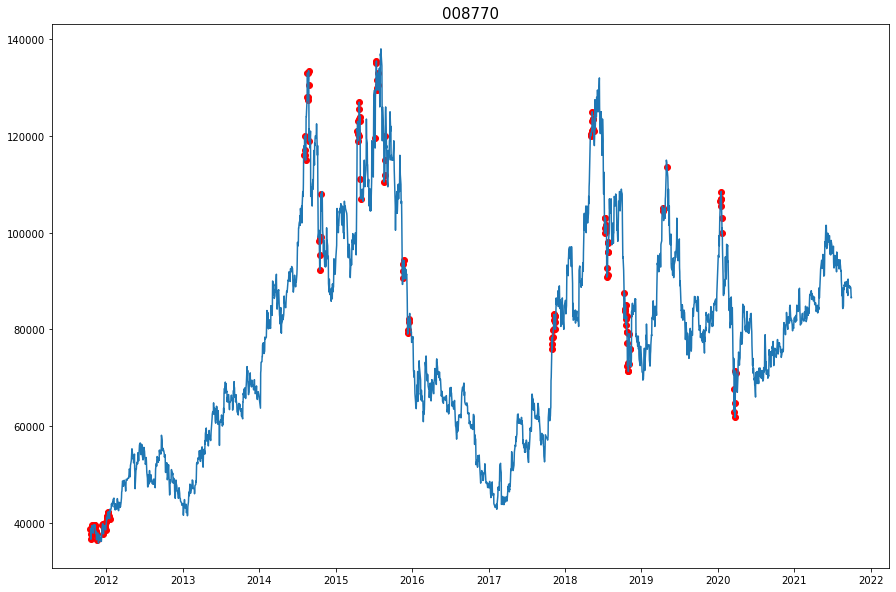

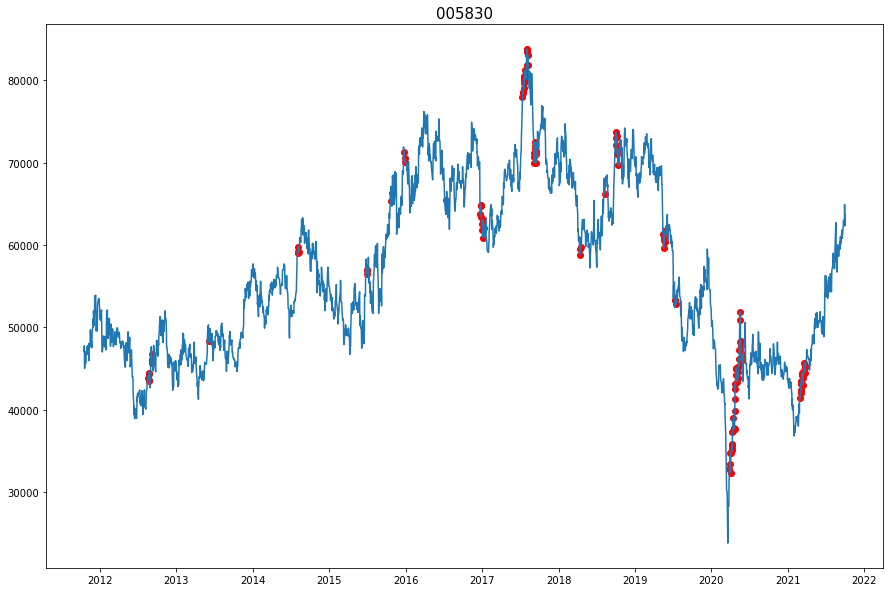

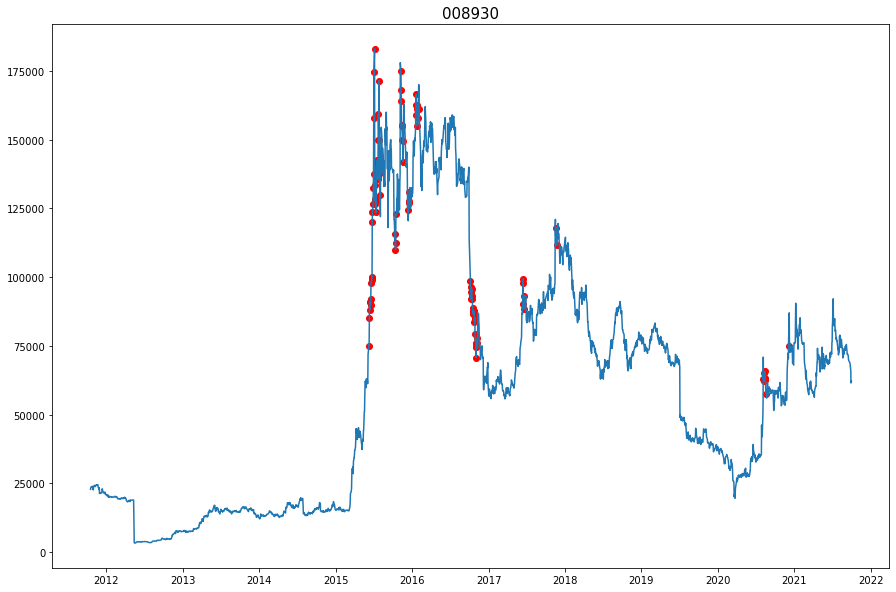

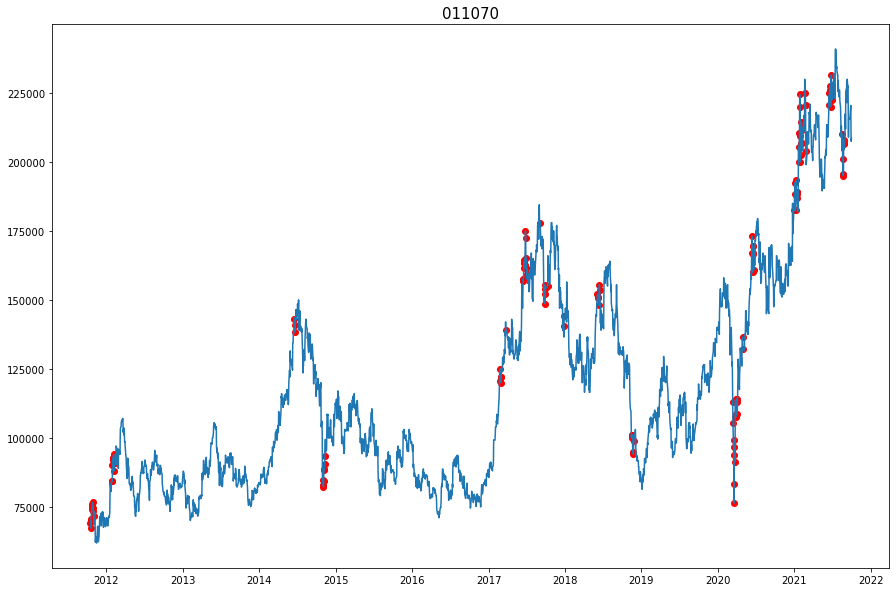

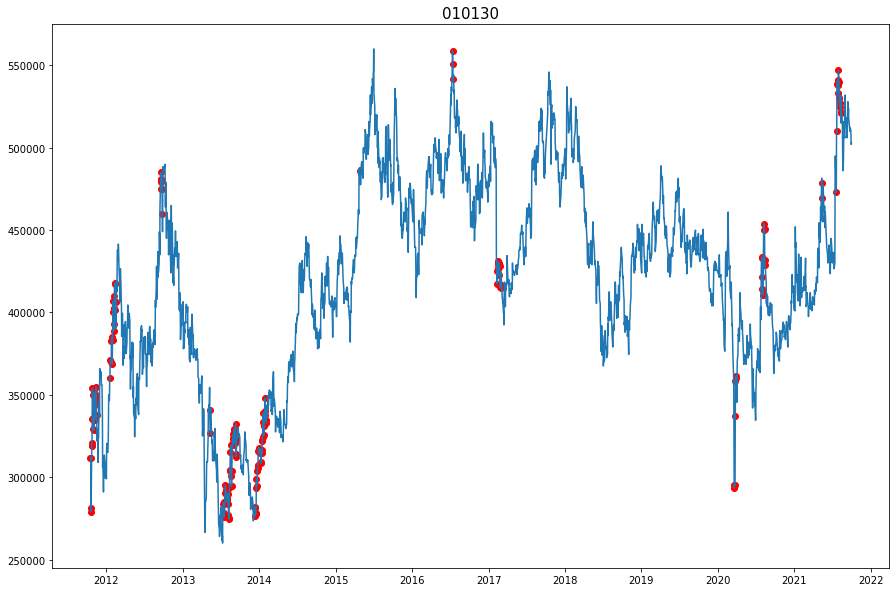

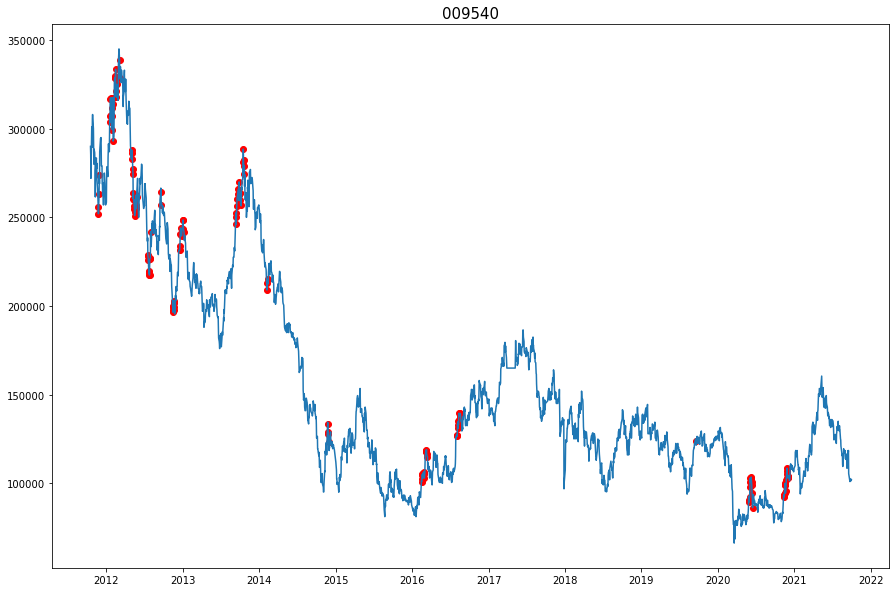

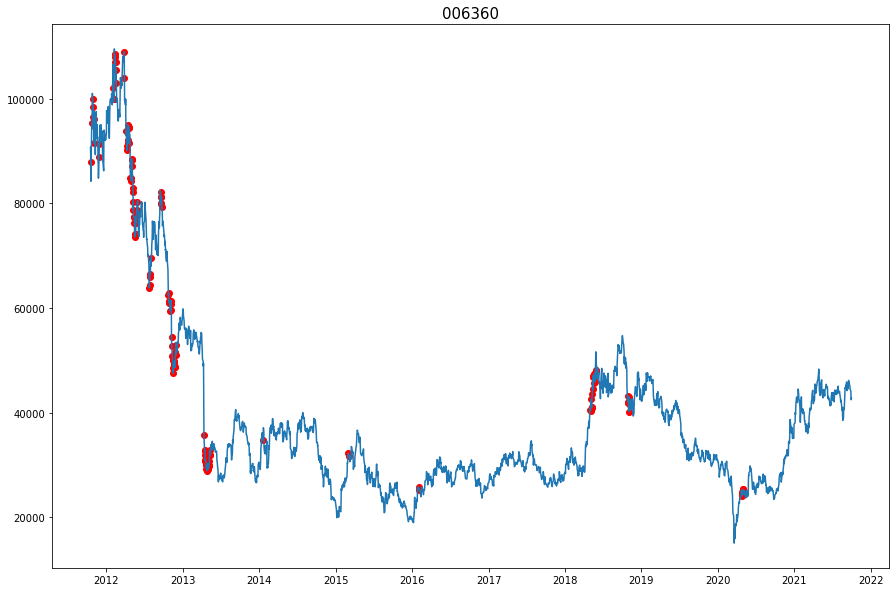

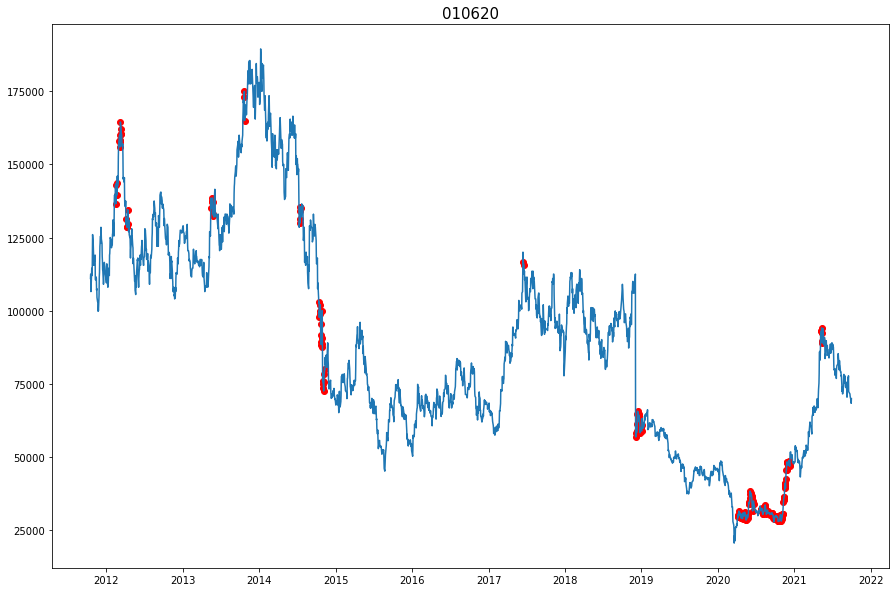

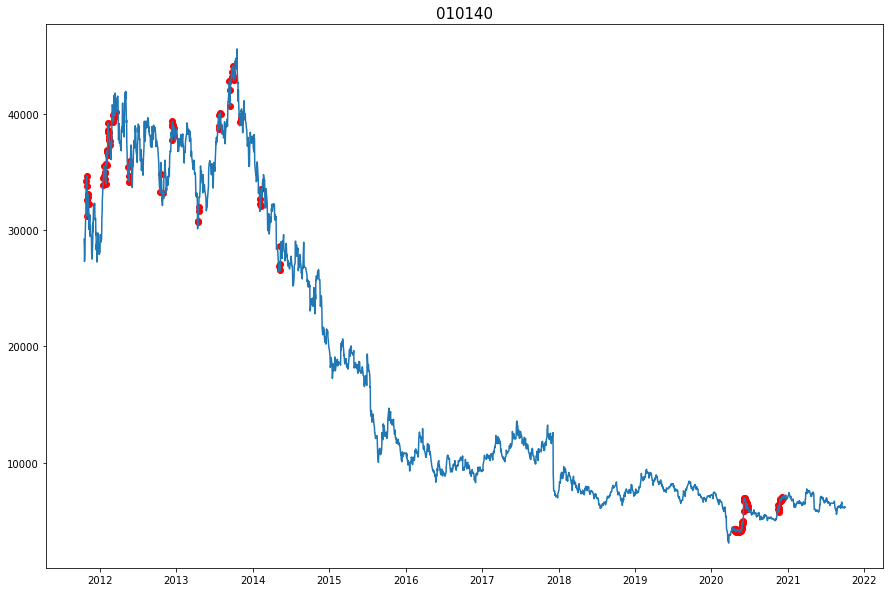

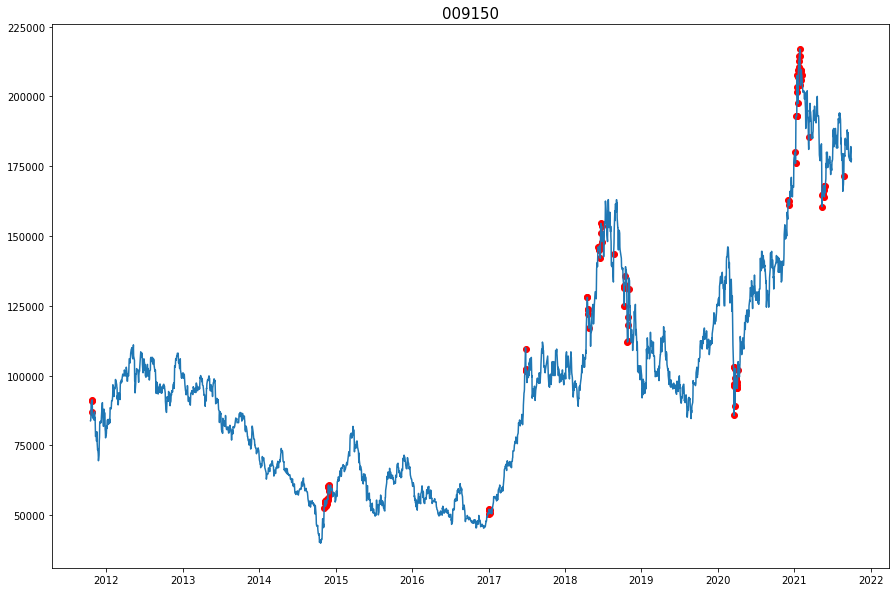

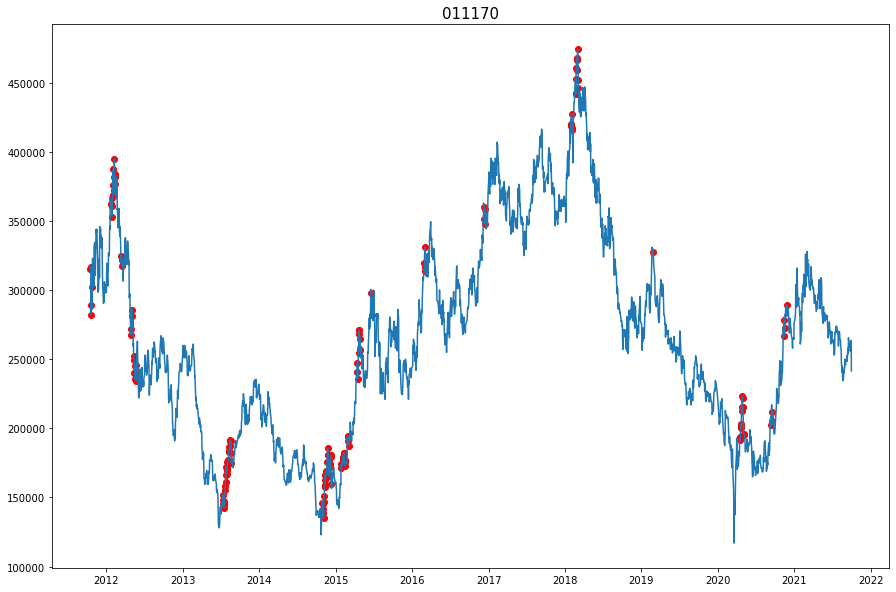

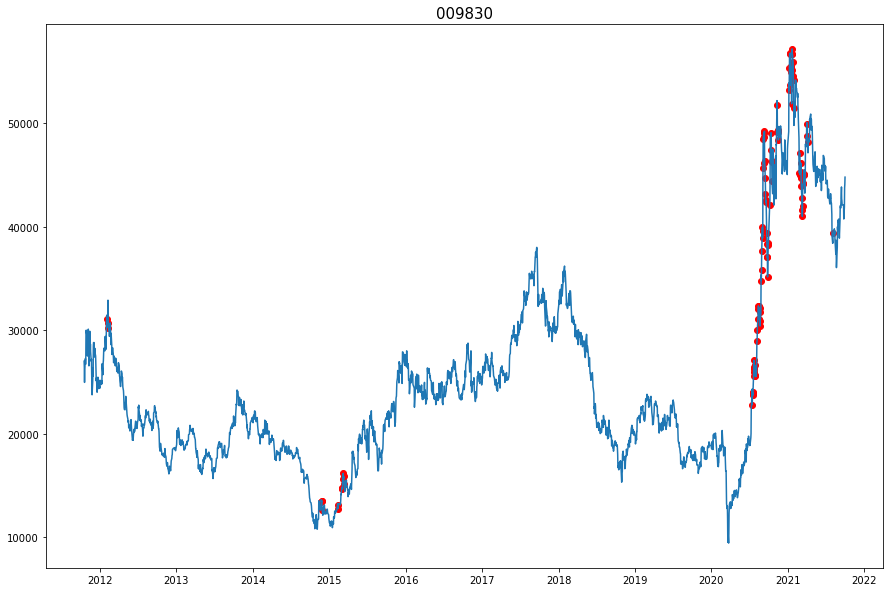

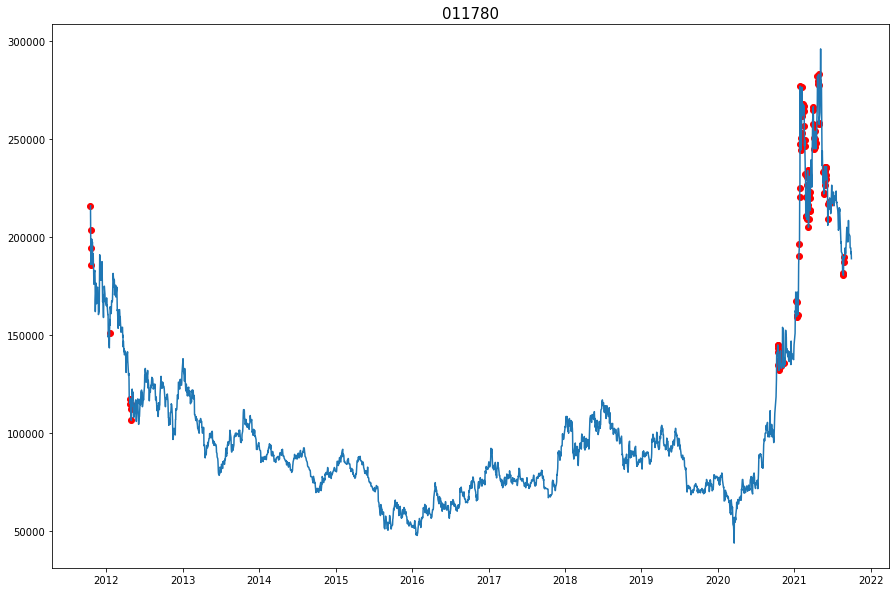

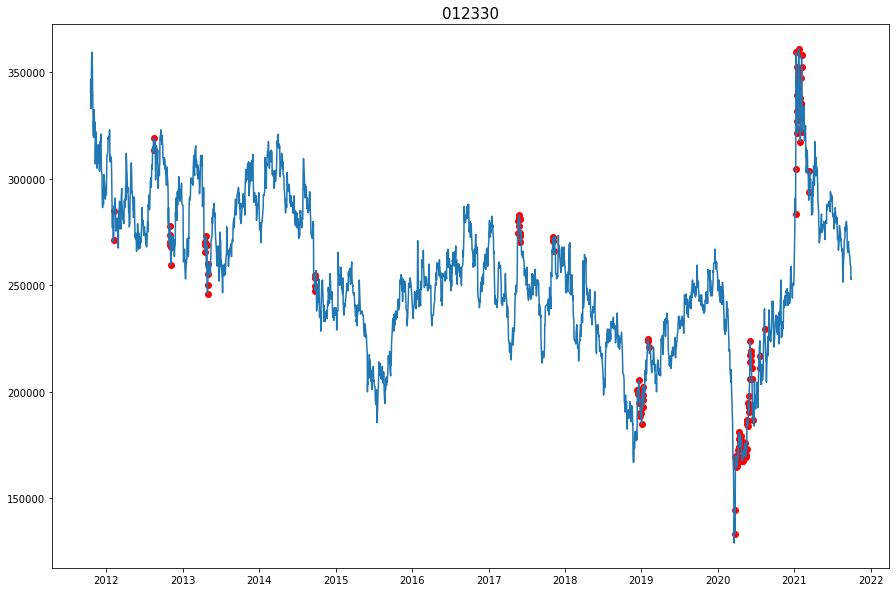

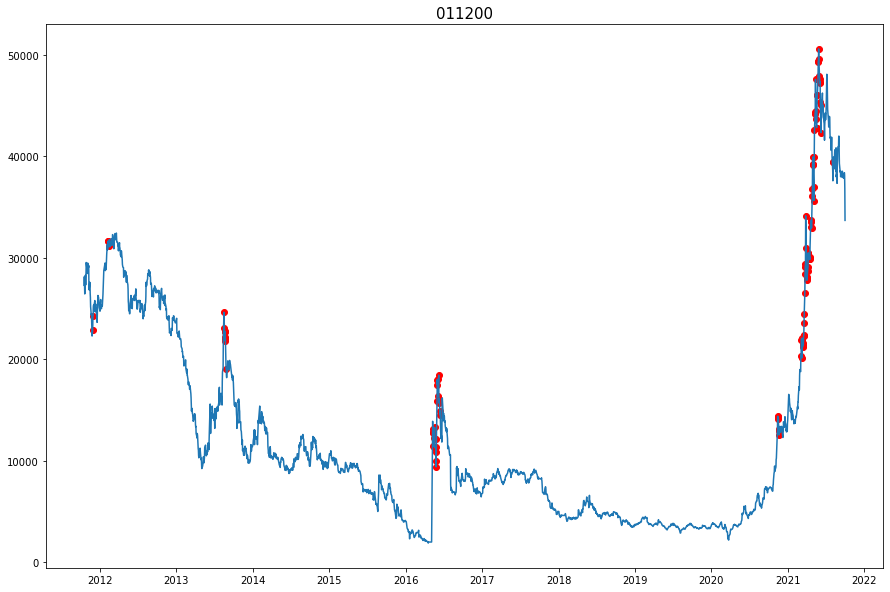

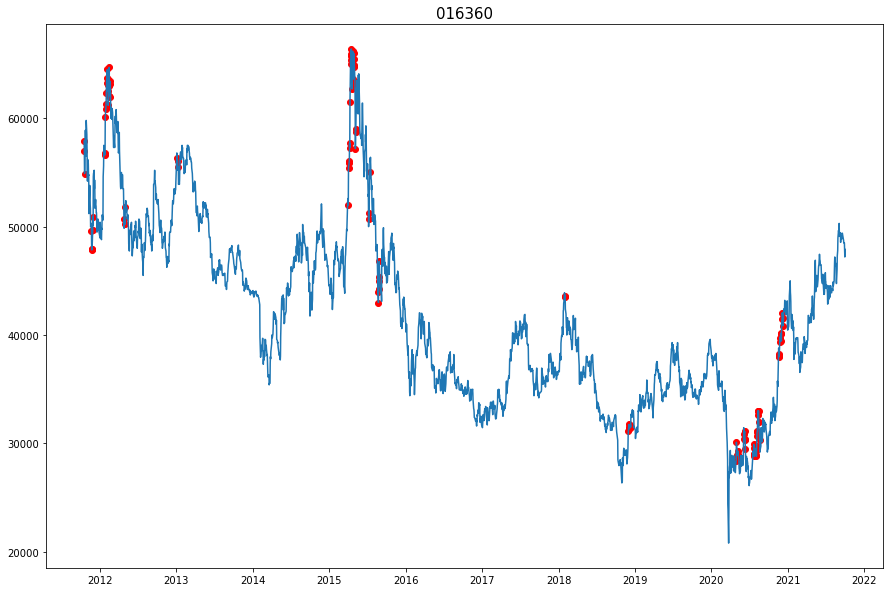

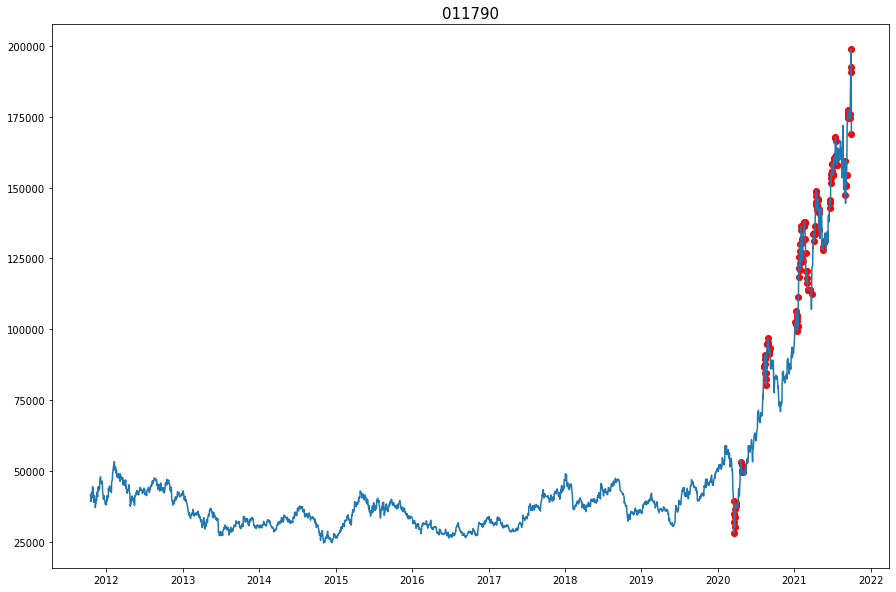

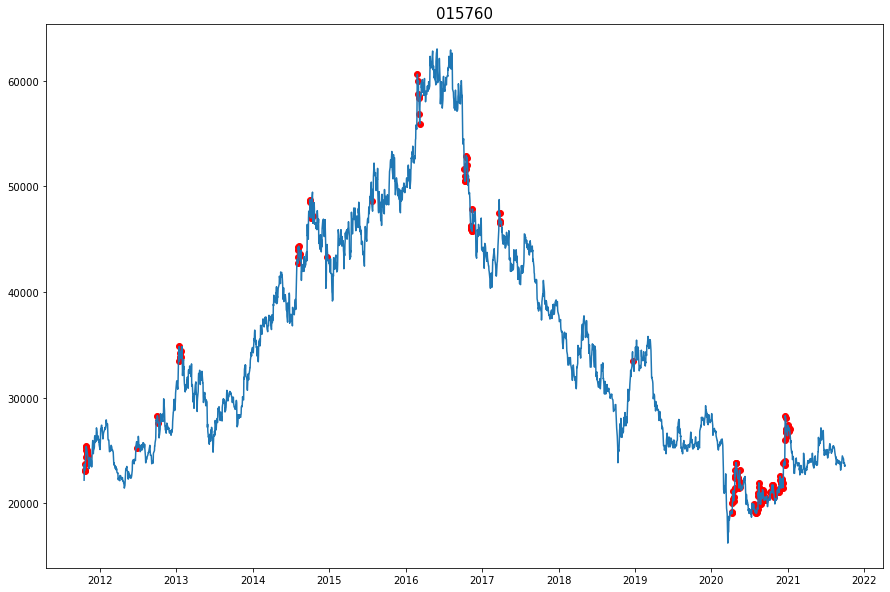

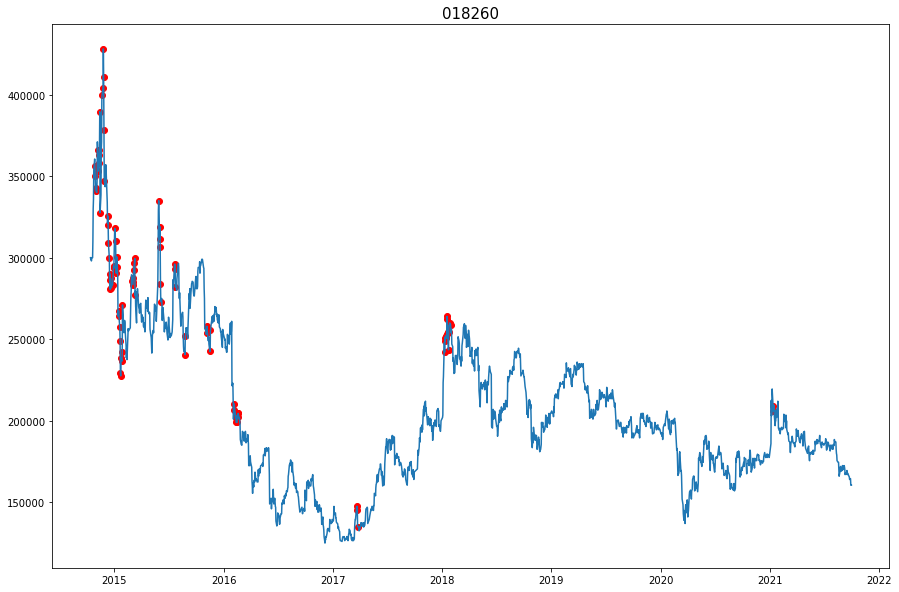

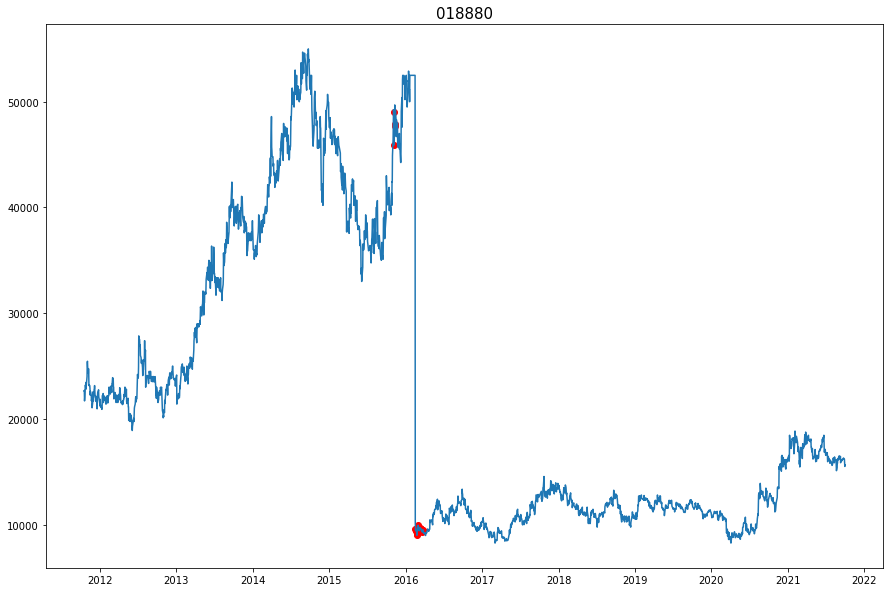

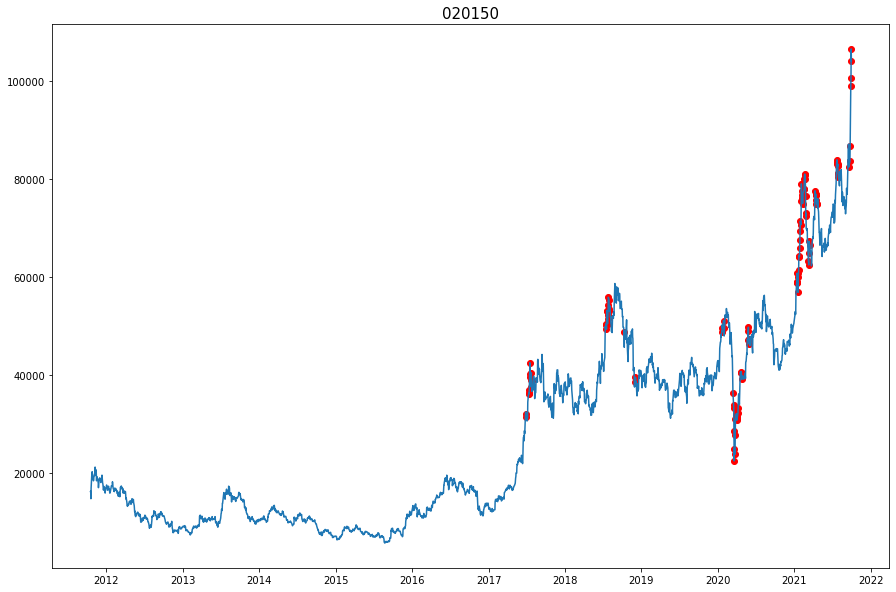

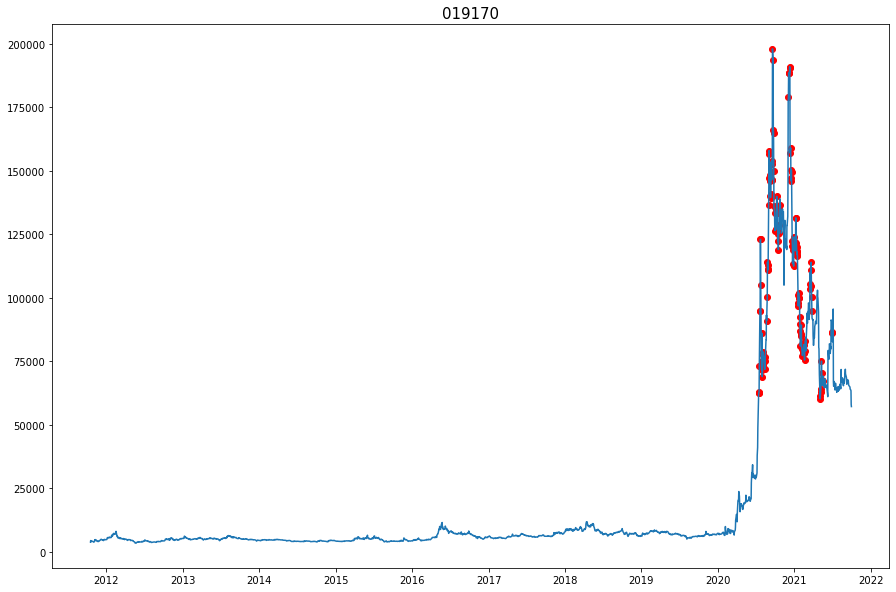

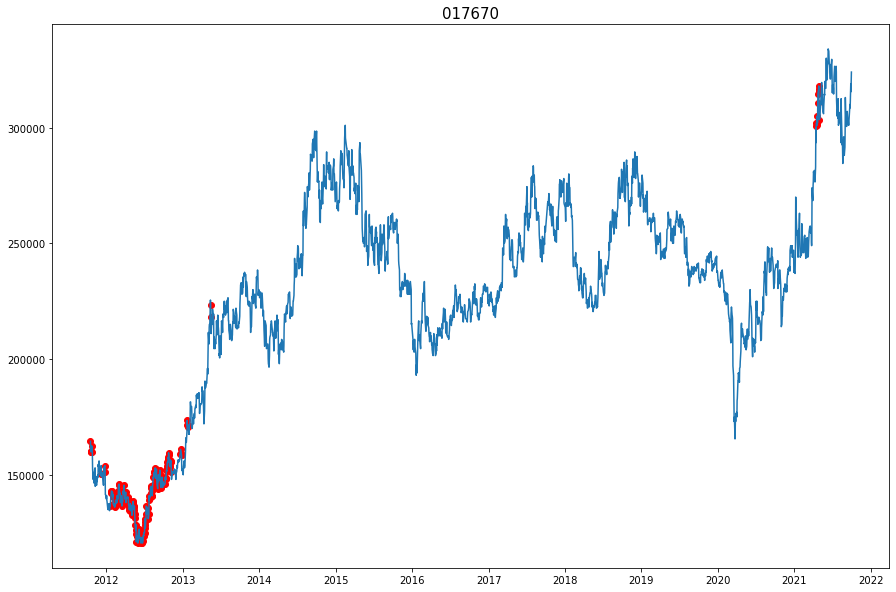

In [9]:
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="2"

for files in tqdm(datalist):
#     data_dir = './processing_data/000660_SK#Ud558#Uc774#Ub2c9#Uc2a4.csv'
    df = pd.read_csv(files)

    df = df[['Date', 'price']]
    df['Date'] = pd.to_datetime(df['Date'])
    test = df
    test=test.replace(np.nan,0)

    scaler=StandardScaler()

    scaler = scaler.fit(test[['price']])
    test['price'] = scaler.transform(test[['price']])
    
    TIME_STEPS=30

    def create_sequences(X, y, time_steps=TIME_STEPS):
        Xs, ys = [], []
        for i in range(len(X)-time_steps):
            Xs.append(X.iloc[i:(i+time_steps)].values)
            ys.append(y.iloc[i+time_steps])

        return np.array(Xs), np.array(ys)

    # X_train, y_train = create_sequences(train[['price']], train['price'])
    X_test, y_test = create_sequences(test[['price']], test['price'])
    
    # from tf.keras.models import load_model
    modelpath = './anomaly_best.h5'
    model=tf.keras.models.load_model(modelpath)

    X_test_pred = model.predict(X_test, verbose=0)
    test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

    threshold = np.mean(test_mae_loss) + np.std(test_mae_loss) *1.7
    # threshold = 0.25
    print(f'Reconstruction error threshold: {threshold}')
    
    test_score_df = pd.DataFrame(test[TIME_STEPS:])
    test_score_df['loss'] = test_mae_loss
    test_score_df['threshold'] = threshold
    test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']
    test_score_df['price'] = test[TIME_STEPS:]['price']
    
    anomalies = test_score_df.loc[test_score_df['anomaly'] == True]
    
#     print(files[13:19])
#     print(anomalies['Date'])
    name = files[13:19]
    print(name)
    anomalies['Date'].to_csv('./abnormal_data/' + name + '.csv', index=True)
    
    plt.figure(figsize=(15,10))
    plt.plot(test_score_df['Date'], scaler.inverse_transform(test_score_df['price']))
    plt.scatter(x=anomalies['Date'], y=scaler.inverse_transform(anomalies['price']), color='r')
    # plt.plot(anomalies['Date'], scaler.inverse_transform(anomalies['price']), color='r')
    # plt.update_layout(showlegend=True, title='Detected anomalies')
    plt.title(name, fontsize = 15)
    plt.savefig('./figure_abnormal/' + name + '.png')

In [8]:
anomalies['Date']

230    2020-10-27
231    2020-10-26
232    2020-10-23
233    2020-10-22
234    2020-10-21
          ...    
1197   2016-11-16
1198   2016-11-15
1199   2016-11-14
1200   2016-11-11
1201   2016-11-10
Name: Date, Length: 109, dtype: datetime64[ns]

In [7]:
anomalies['Date'].to_csv()
nu

array(['2020-10-27T00:00:00.000000000', '2020-10-26T00:00:00.000000000',
       '2020-10-23T00:00:00.000000000', '2020-10-22T00:00:00.000000000',
       '2020-10-21T00:00:00.000000000', '2020-10-20T00:00:00.000000000',
       '2020-06-04T00:00:00.000000000', '2020-06-03T00:00:00.000000000',
       '2020-06-02T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-05-29T00:00:00.000000000', '2020-05-28T00:00:00.000000000',
       '2020-05-27T00:00:00.000000000', '2020-05-26T00:00:00.000000000',
       '2020-05-25T00:00:00.000000000', '2020-05-22T00:00:00.000000000',
       '2020-05-21T00:00:00.000000000', '2020-05-20T00:00:00.000000000',
       '2020-05-19T00:00:00.000000000', '2020-05-18T00:00:00.000000000',
       '2020-05-15T00:00:00.000000000', '2020-05-14T00:00:00.000000000',
       '2020-04-03T00:00:00.000000000', '2020-04-02T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000', '2020-03-31T00:00:00.000000000',
       '2020-03-18T00:00:00.000000000', '2020-03-17